### Connectome object
The main class used for interfacing with the connectome. This allows you to:
* query root IDs
* find downstream or upstream partners of a list of root IDs up to an arbitrary number of hops
* get connectivity between pairs of cell types, optionally broken down by different estimated neurotransmitter types
* systematically run the connectivity algorithm between a list of source and target cell types
* find intersecting pathways between two cell types up to an arbitrary number of hops


In [1]:
from connectome import *

imported navis version: 1.6.0


In [2]:
cell_a, cell_b = 'LC11', 'LC17'
# look-up IDs
database = Connectome()
root_ids = database.lookup_root_ids(cell_a)
root_ids

Using annotation version "latest tagged release" (ebd66db from 2024-07-30) from https://github.com/flyconnectome/flywire_annotations.
Found 127 neurons matching the given criteria.
Using materialization version 783.


[720575940631673939,
 720575940625637122,
 720575940619674606,
 720575940618728705,
 720575940630560056,
 720575940610717077,
 720575940623154429,
 720575940629933354,
 720575940626847976,
 720575940635104879,
 720575940629416044,
 720575940634500856,
 720575940612986773,
 720575940632714977,
 720575940626796456,
 720575940620047877,
 720575940619071646,
 720575940611300570,
 720575940635449230,
 720575940606362912,
 720575940632723364,
 720575940627019004,
 720575940637538118,
 720575940627014172,
 720575940622932438,
 720575940603578848,
 720575940634144875,
 720575940639453685,
 720575940629224492,
 720575940606549426,
 720575940621712500,
 720575940637044799,
 720575940622176550,
 720575940622015635,
 720575940615593044,
 720575940636578014,
 720575940628327362,
 720575940635183502,
 720575940607860419,
 720575940607861443,
 720575940613980335,
 720575940659229057,
 720575940641706637,
 720575940639040858,
 720575940629311452,
 720575940633104992,
 720575940615867103,
 720575940623

In [3]:
# get_paths
paths = database.get_paths(root_ids, max_hops=3)
paths.node_info

Completed 1 hops involving 7662 cells and 107522 edges.
Completed 2 hops involving 79627 cells and 3103422 edges.
Completed 3 hops involving 45928 cells and 3559264 edges.
Using materialization version 783.


supervoxel_id             root_id   pos_x  pos_y  pos_z    soma_x  \
79553   82827998297886131  720575940596125868  177736  65679   5142  181053.0   
75469   84518291200692604  720575940597856265  202181  87362   5077  208720.0   
102393  83603222581361380  720575940597944841  188598  82812   4584  207464.0   
60212   82899191206227573  720575940598267657  178736  77928   1872  178736.0   
59785   82547416271809513  720575940599333574  173512  79128   2096  173512.0   
...                   ...                 ...     ...    ...    ...       ...   
39059   78959297648204485  720575940661335681  121087  88940   3501  123840.0   
63076   75366987202696949  720575940661336193   68928  36680   4680   68928.0   
23247   77618099821696189  720575940661337217  101936  26736   4753  101936.0   
35868   80858566210272930  720575940661338497  148832  78728    826  148832.0   
128314  85430954436464869  720575940661339777  215601  55382   3654       NaN   

         soma_y  soma_z  nucleus_id       flow  ... top_nt_conf  \
79553   68883.0  6077.0         NaN  intrinsic  ...    0.590985   
75469   88664.0  4841.0   8562842.0  intrinsic  ...    0.836335   
102393  93752.0  4126.0   8587912.0  intrinsic  ...    0.786729   
60212   77928.0  1872.0   7458871.0  intrinsic  ...    0.731893   
59785   79128.0  2096.0   7461375.0  intrinsic  ...    0.614912   
...         ...     ...         ...        ...  ...         ...   
39059   91472.0  4306.0   4767840.0  intrinsic  ...    0.718498   
63076   36680.0  4680.0   1243196.0  intrinsic  ...    0.636331   
23247   26736.0  4753.0   2354214.0  intrinsic  ...    0.565212   
35868   78728.0   826.0   6454602.0   efferent  ...    0.423383   
128314      NaN     NaN         NaN   afferent  ...    0.349104   

                                   known_nt  \
79553                         acetylcholine   
75469                                   NaN   
102393                                  NaN   
60212                                  gaba   
59785                         acetylcholine   
...                                     ...   
39059                                   NaN   
63076                         acetylcholine   
23247   acetylcholine, Nplp1, sNPF, sparkly   
35868                                   NaN   
128314                                  NaN   

                                 known_nt_source   side nerve    vfb_id  \
79553   Mauss et al. 2014; Shinomiya et al. 2014  right   NaN  fw080370   
75469                                        NaN  right   NaN  fw076270   
102393                                       NaN  right   NaN  fw103243   
60212                       Takemura et al. 2017  right   NaN  fw060858   
59785                         Davis et al., 2020  right   NaN  fw060430   
...                                          ...    ...   ...       ...   
39059                                        NaN   left   NaN  fw039184   
63076                         Davis et al., 2020   left   NaN  fw063731   
23247     Barnstedt et al. 2016; Aso et al. 2019   left   NaN  fw023546   
35868                                        NaN  right   PhN  fw036058   
128314                                       NaN  right   NaN  fw132986   

              fbbt_id status level  degree  
79553             NaN    NaN     2       2  
75469             NaN    NaN     2      24  
102393            NaN    NaN     2      14  
60212             NaN    NaN     2      43  
59785             NaN    NaN     2      11  
...               ...    ...   ...     ...  
39059             NaN    NaN     3      37  
63076             NaN    NaN     2      13  
23247   FBbt_00110931    NaN     3       6  
35868             NaN    NaN     3      17  
128314            NaN    NaN     3       1  

[133344 rows x 29 columns]

### Paths object
This class handles pathways from a set of starting points. Connectome.get_paths returns a Paths object of all downstream or upstream paths from a list of starting root IDs up to a specified number of hops. Connectome.get_downstream_convergence returns a Paths object of all intersecting pathways between two cell types or lists of root IDs.

Found 127 neurons matching the given criteria.
Using materialization version 783.
Completed 1 hops involving 7789 cells and 114892 edges.


h:\My Drive\backup\Desktop\programs\navis\connectome.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  connections['hop'] = hop_num +1


Using materialization version 783.
Found 7789 nodes and 43521 edges for LC11.
Found 276 neurons matching the given criteria.
Using materialization version 783.
Completed 1 hops involving 3680 cells and 148105 edges.


h:\My Drive\backup\Desktop\programs\navis\connectome.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  connections['hop'] = hop_num +1


Using materialization version 783.
Found 3680 nodes and 36172 edges for LC17.
Saved composite figure to ./LC11_onto_LC17_connectivity.svg
Go here to see the target cells colored by the number of inputs: https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/6477446581846016
Go here to see the source cells colored by the number of ouputs: https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/5841461984624640


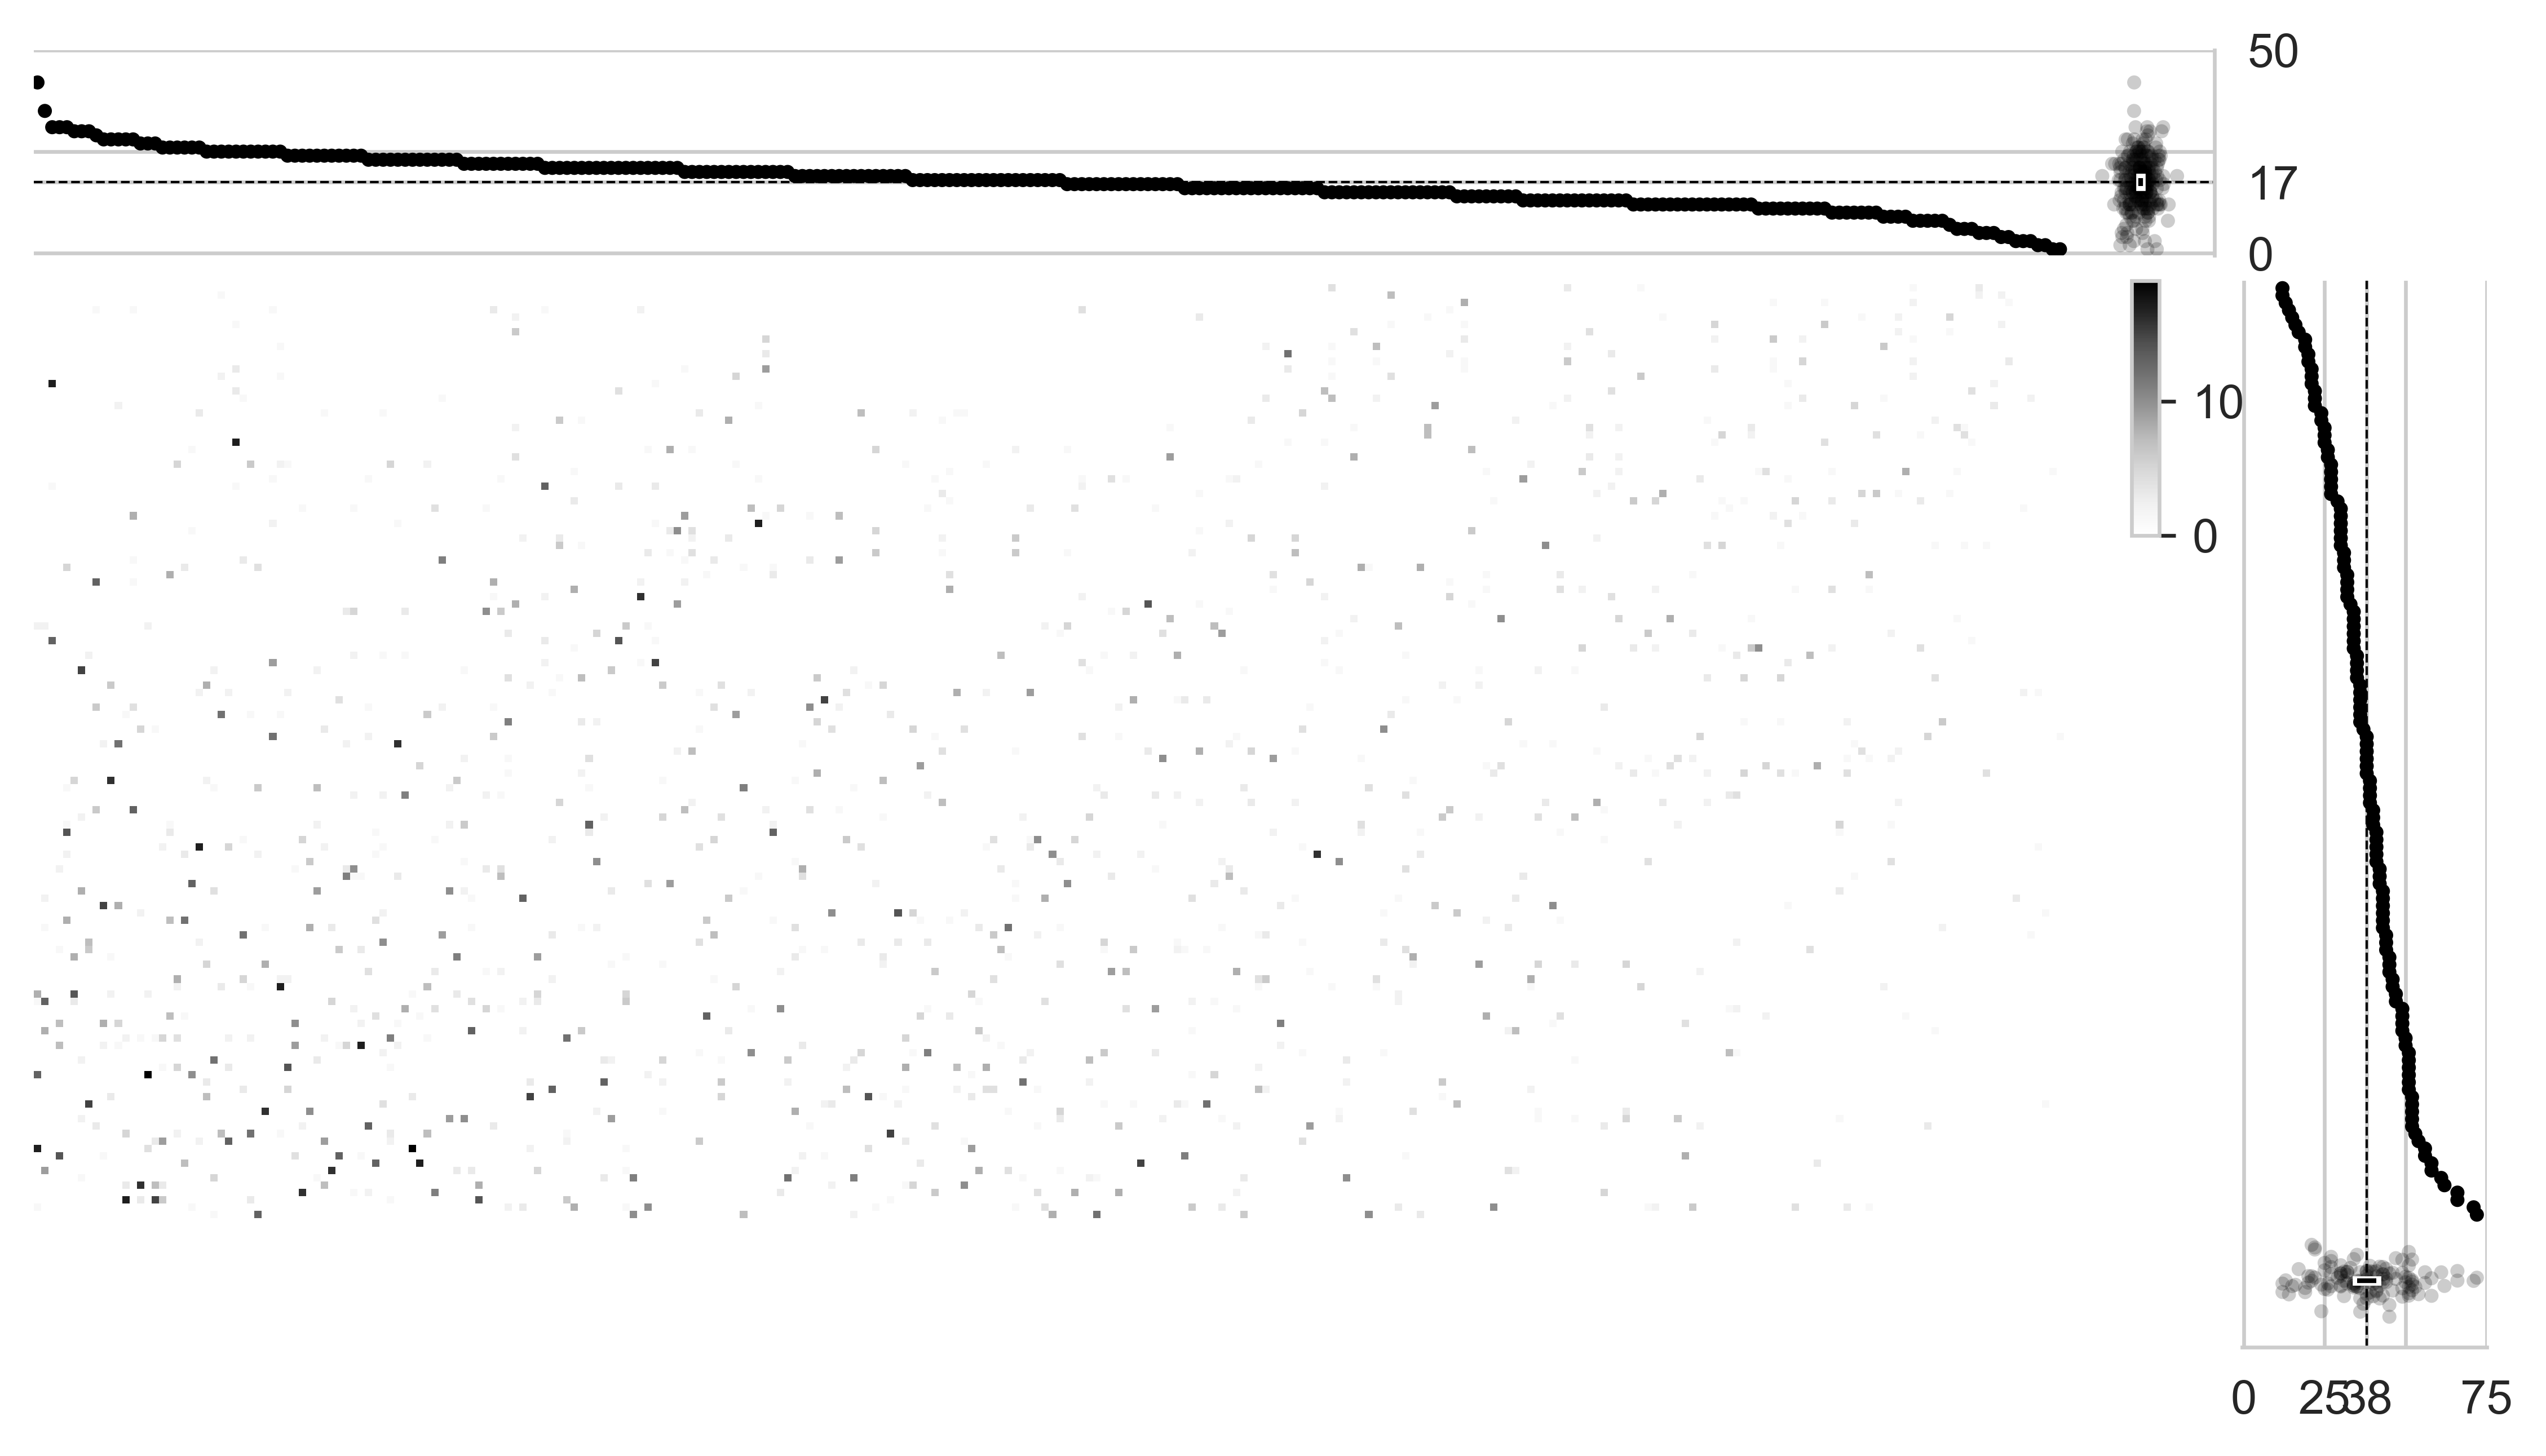

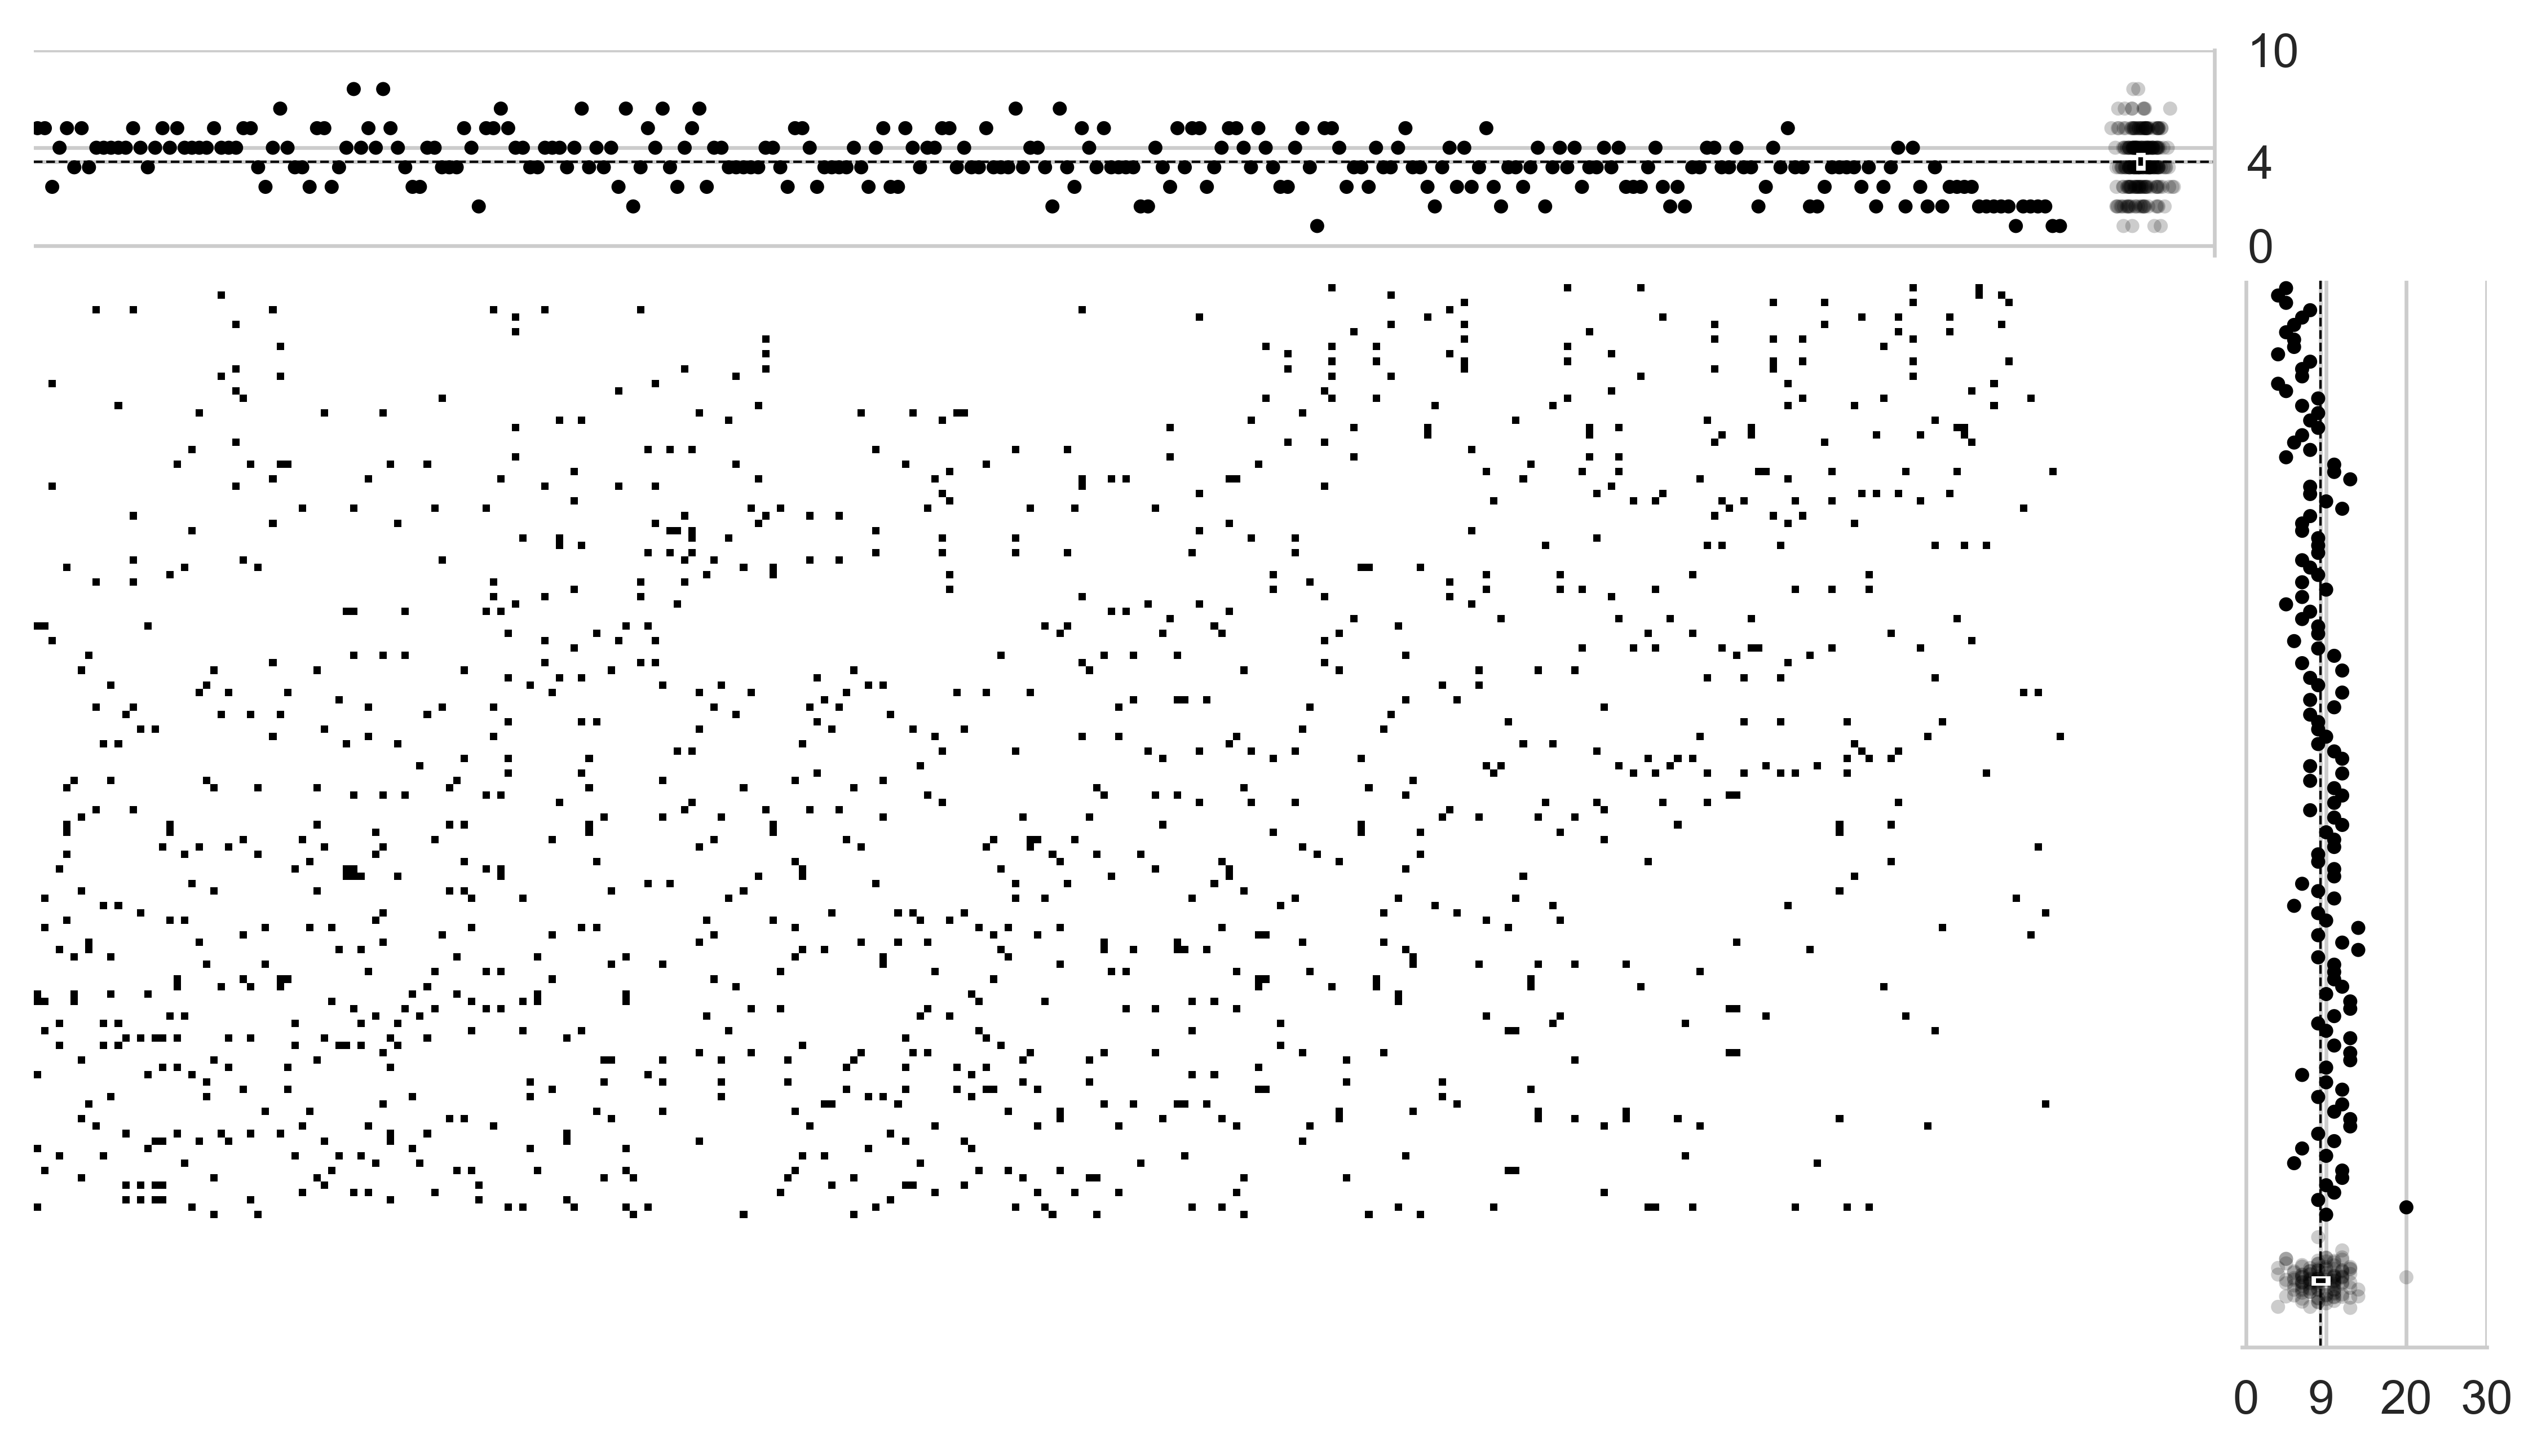

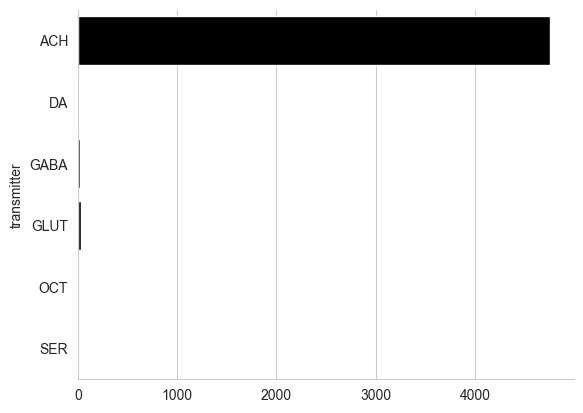

In [4]:
# get_connectivity
adjacency = database.get_connectivity(cell_a, cell_b, sort_by='sum')

LC11 LC11
Saved composite figure to demo\LC11_onto_LC11_connectivity.svg
Go here to see the target cells colored by the number of inputs: https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/5122258201739264
Go here to see the source cells colored by the number of ouputs: https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/6248158108581888
Go here to see example targets colored by transmitter inputs: https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/4995557505368064
Go here to see example sources colored by transmitter outputs: https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/4638926556889088
LC11 LC17
Saved composite figure to demo\LC11_onto_LC17_connectivity.svg
Go here to see the target cells colored by the number of inputs: https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/6246242788048896
Go here to see the source cells colored by the number of ouputs: https://n

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

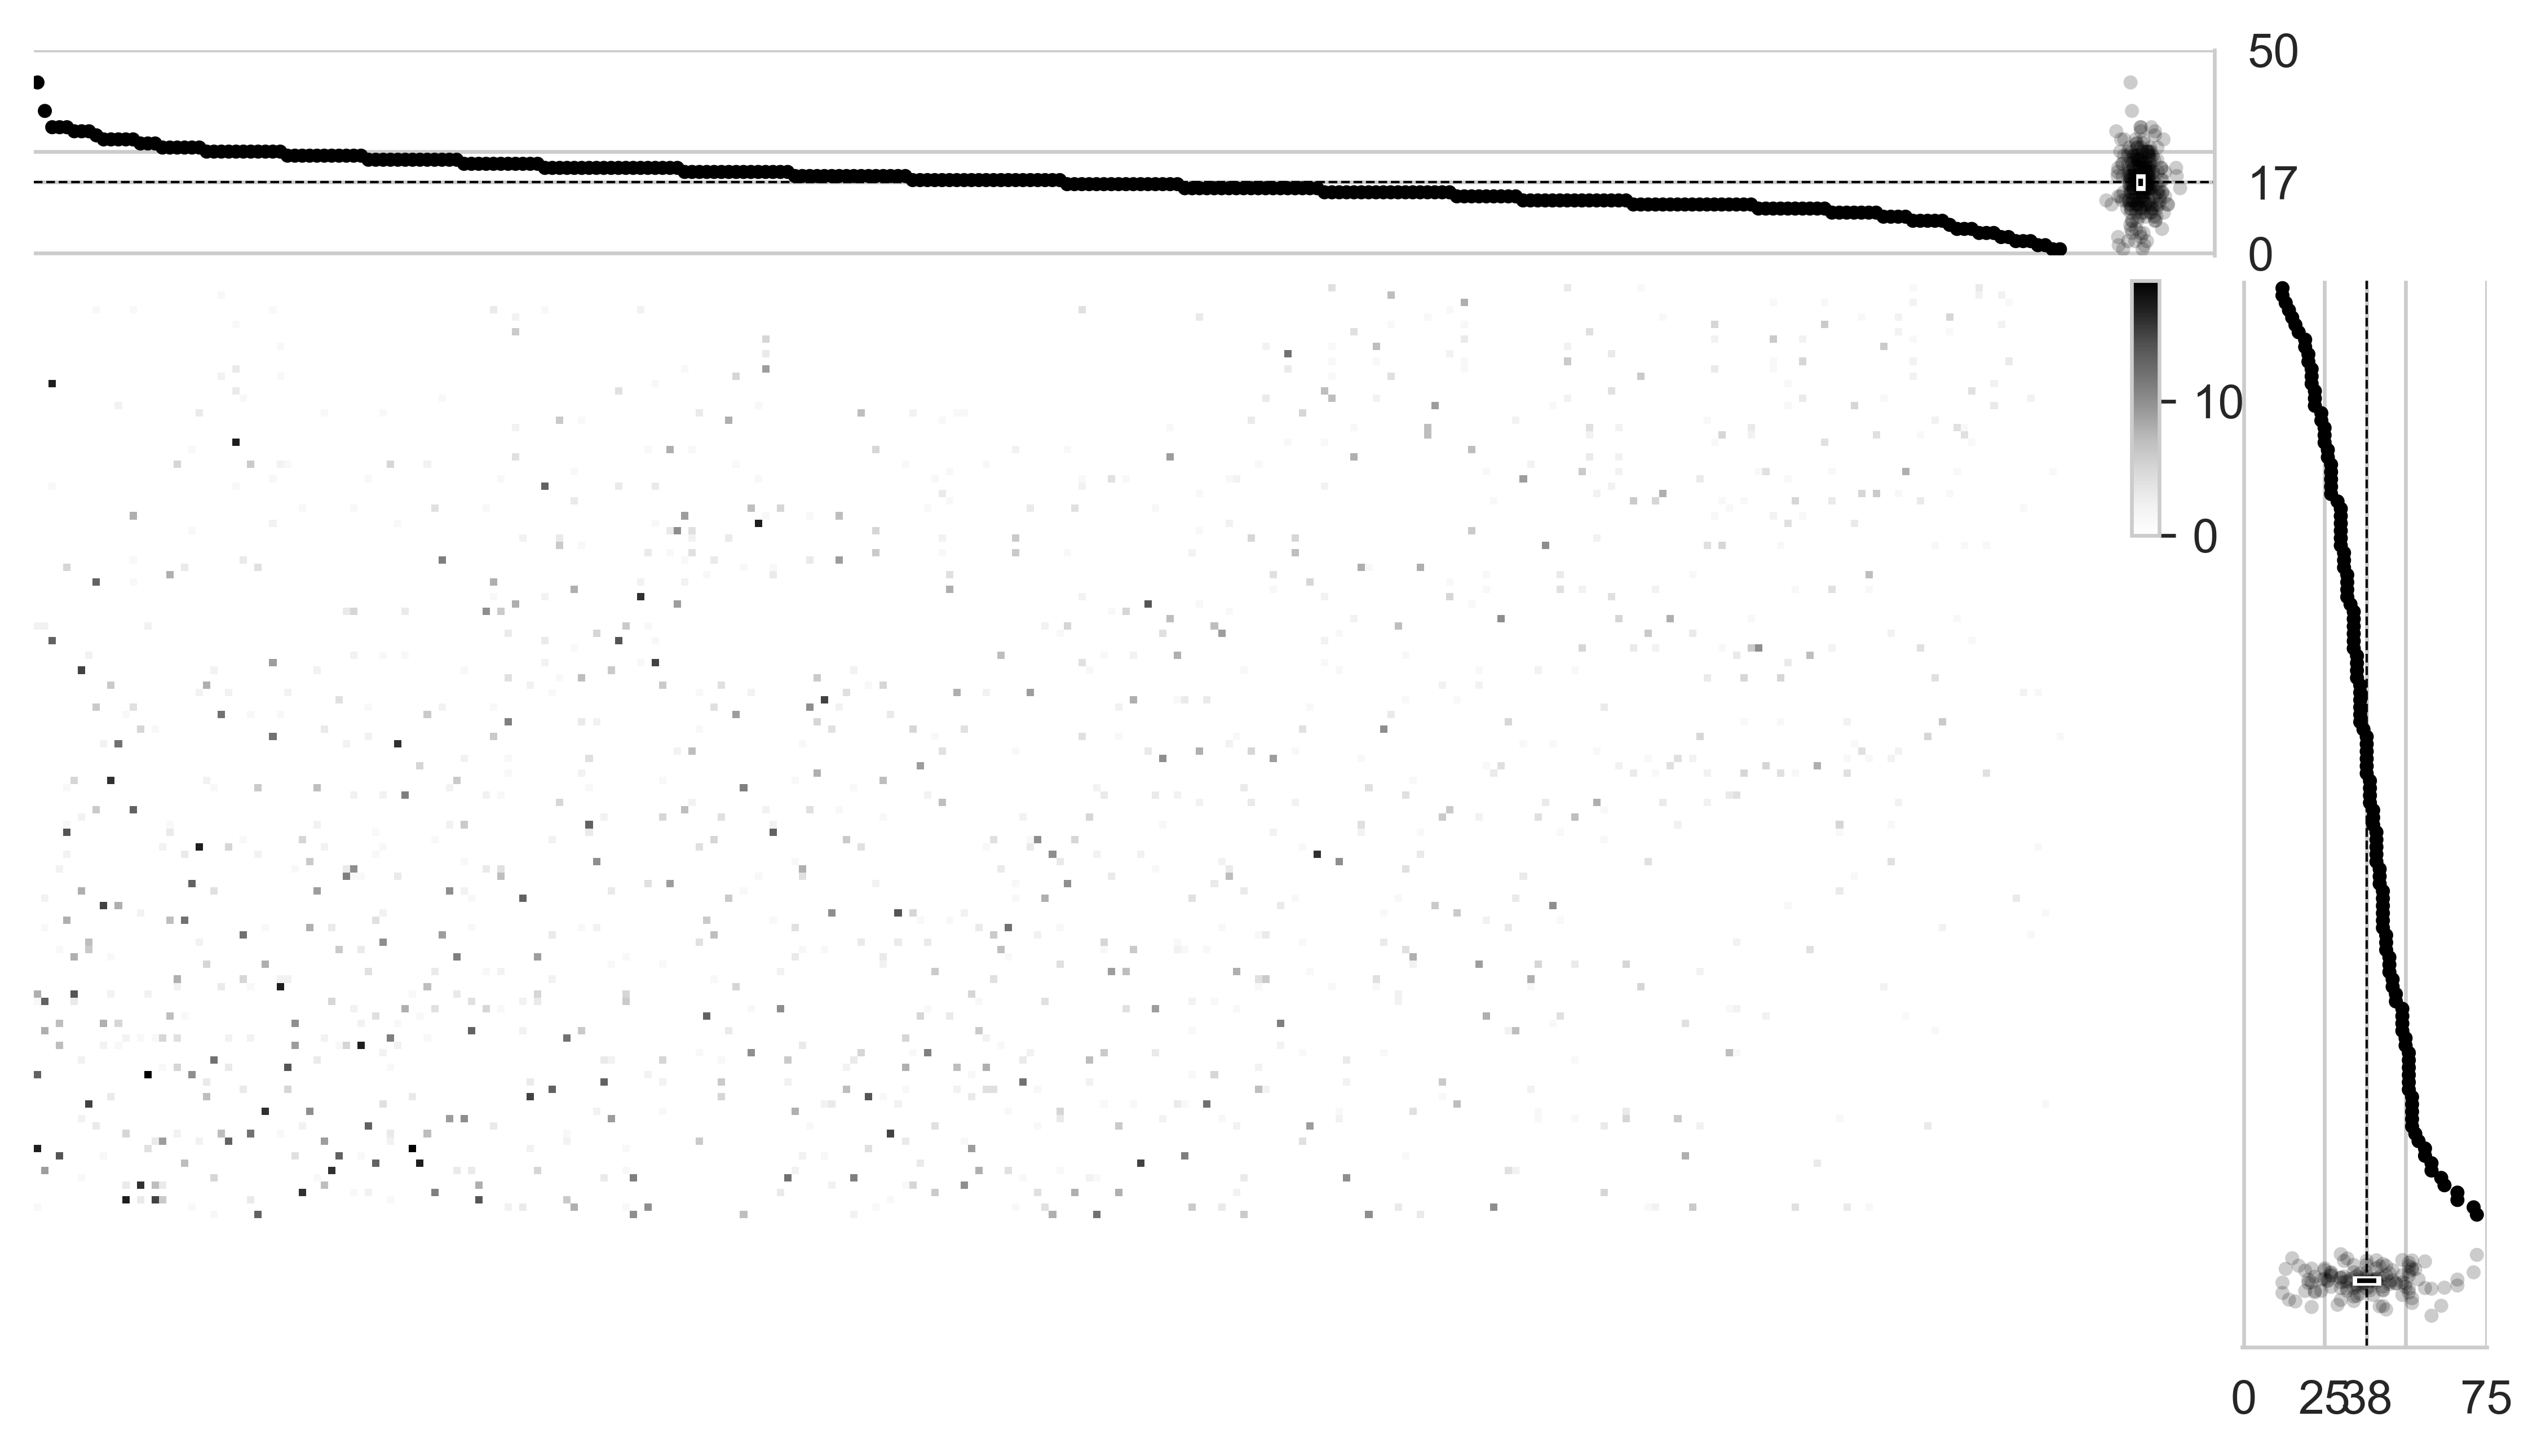

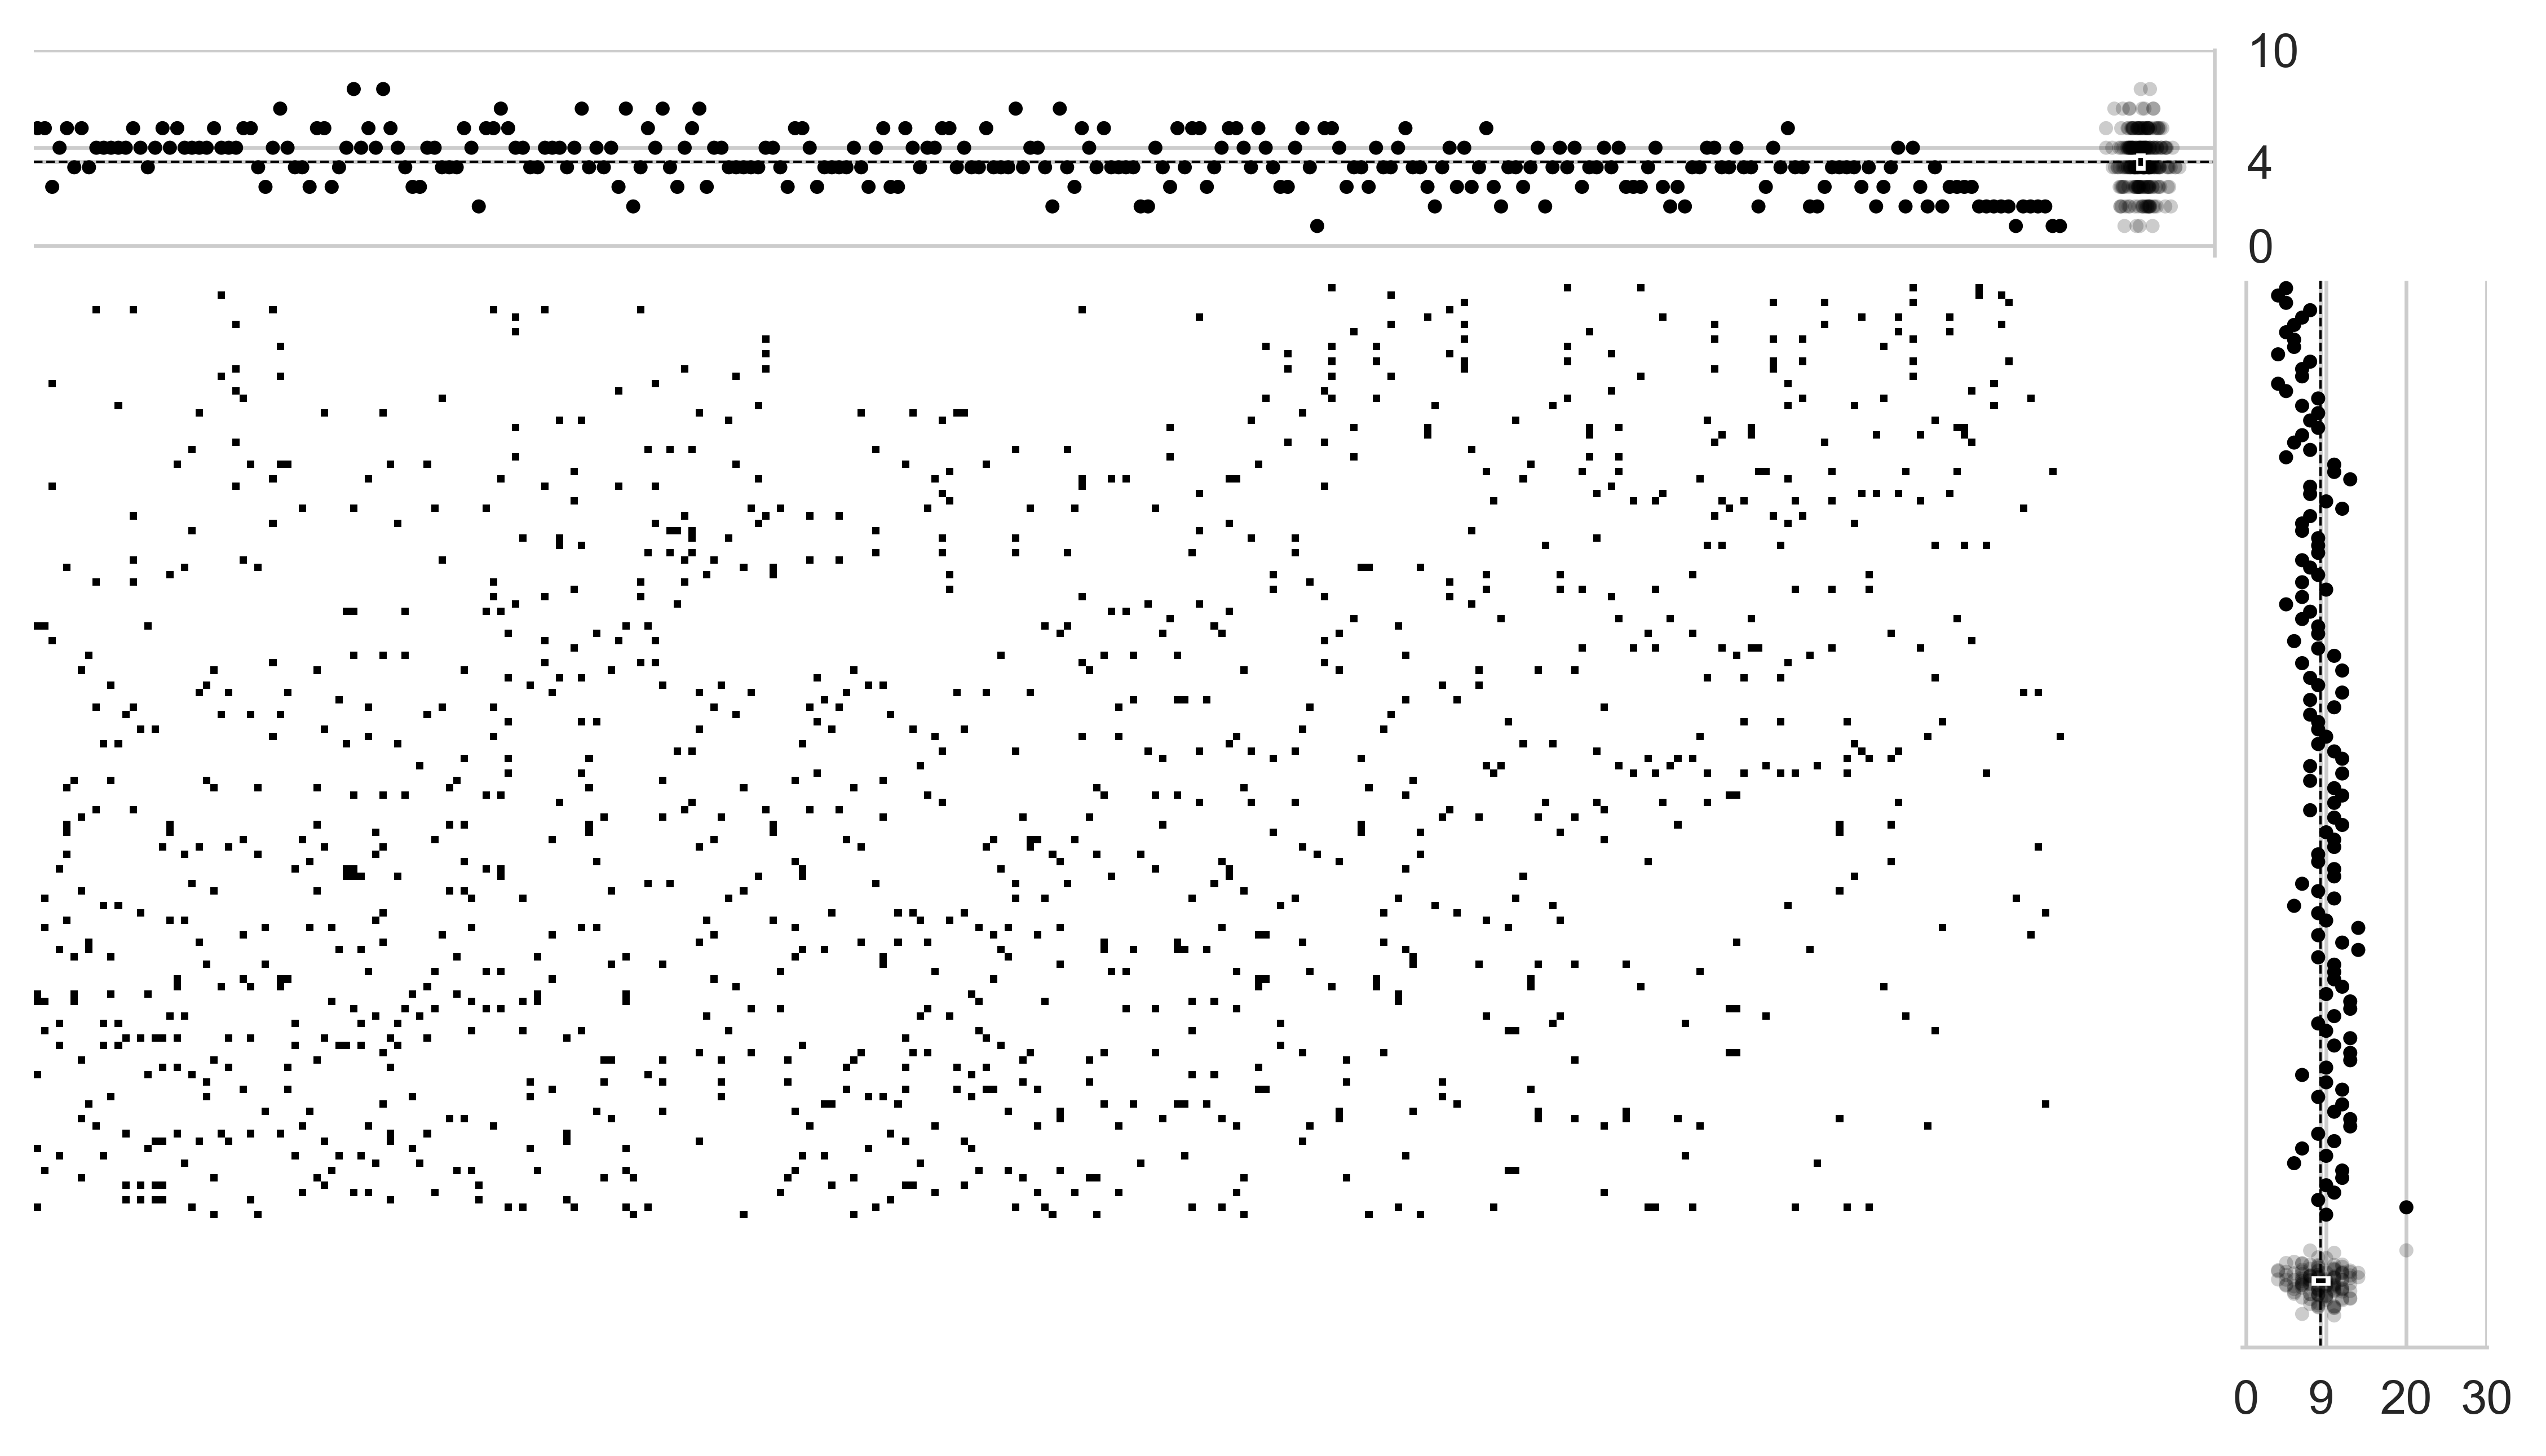

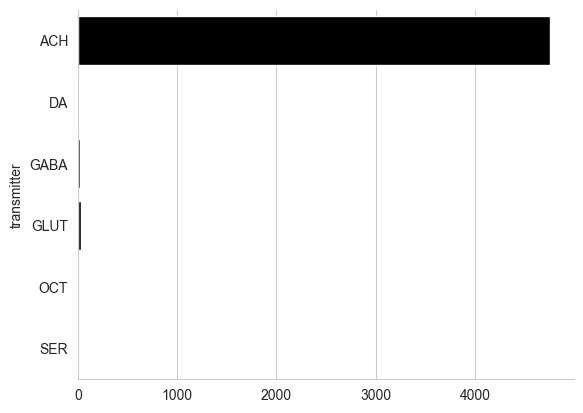

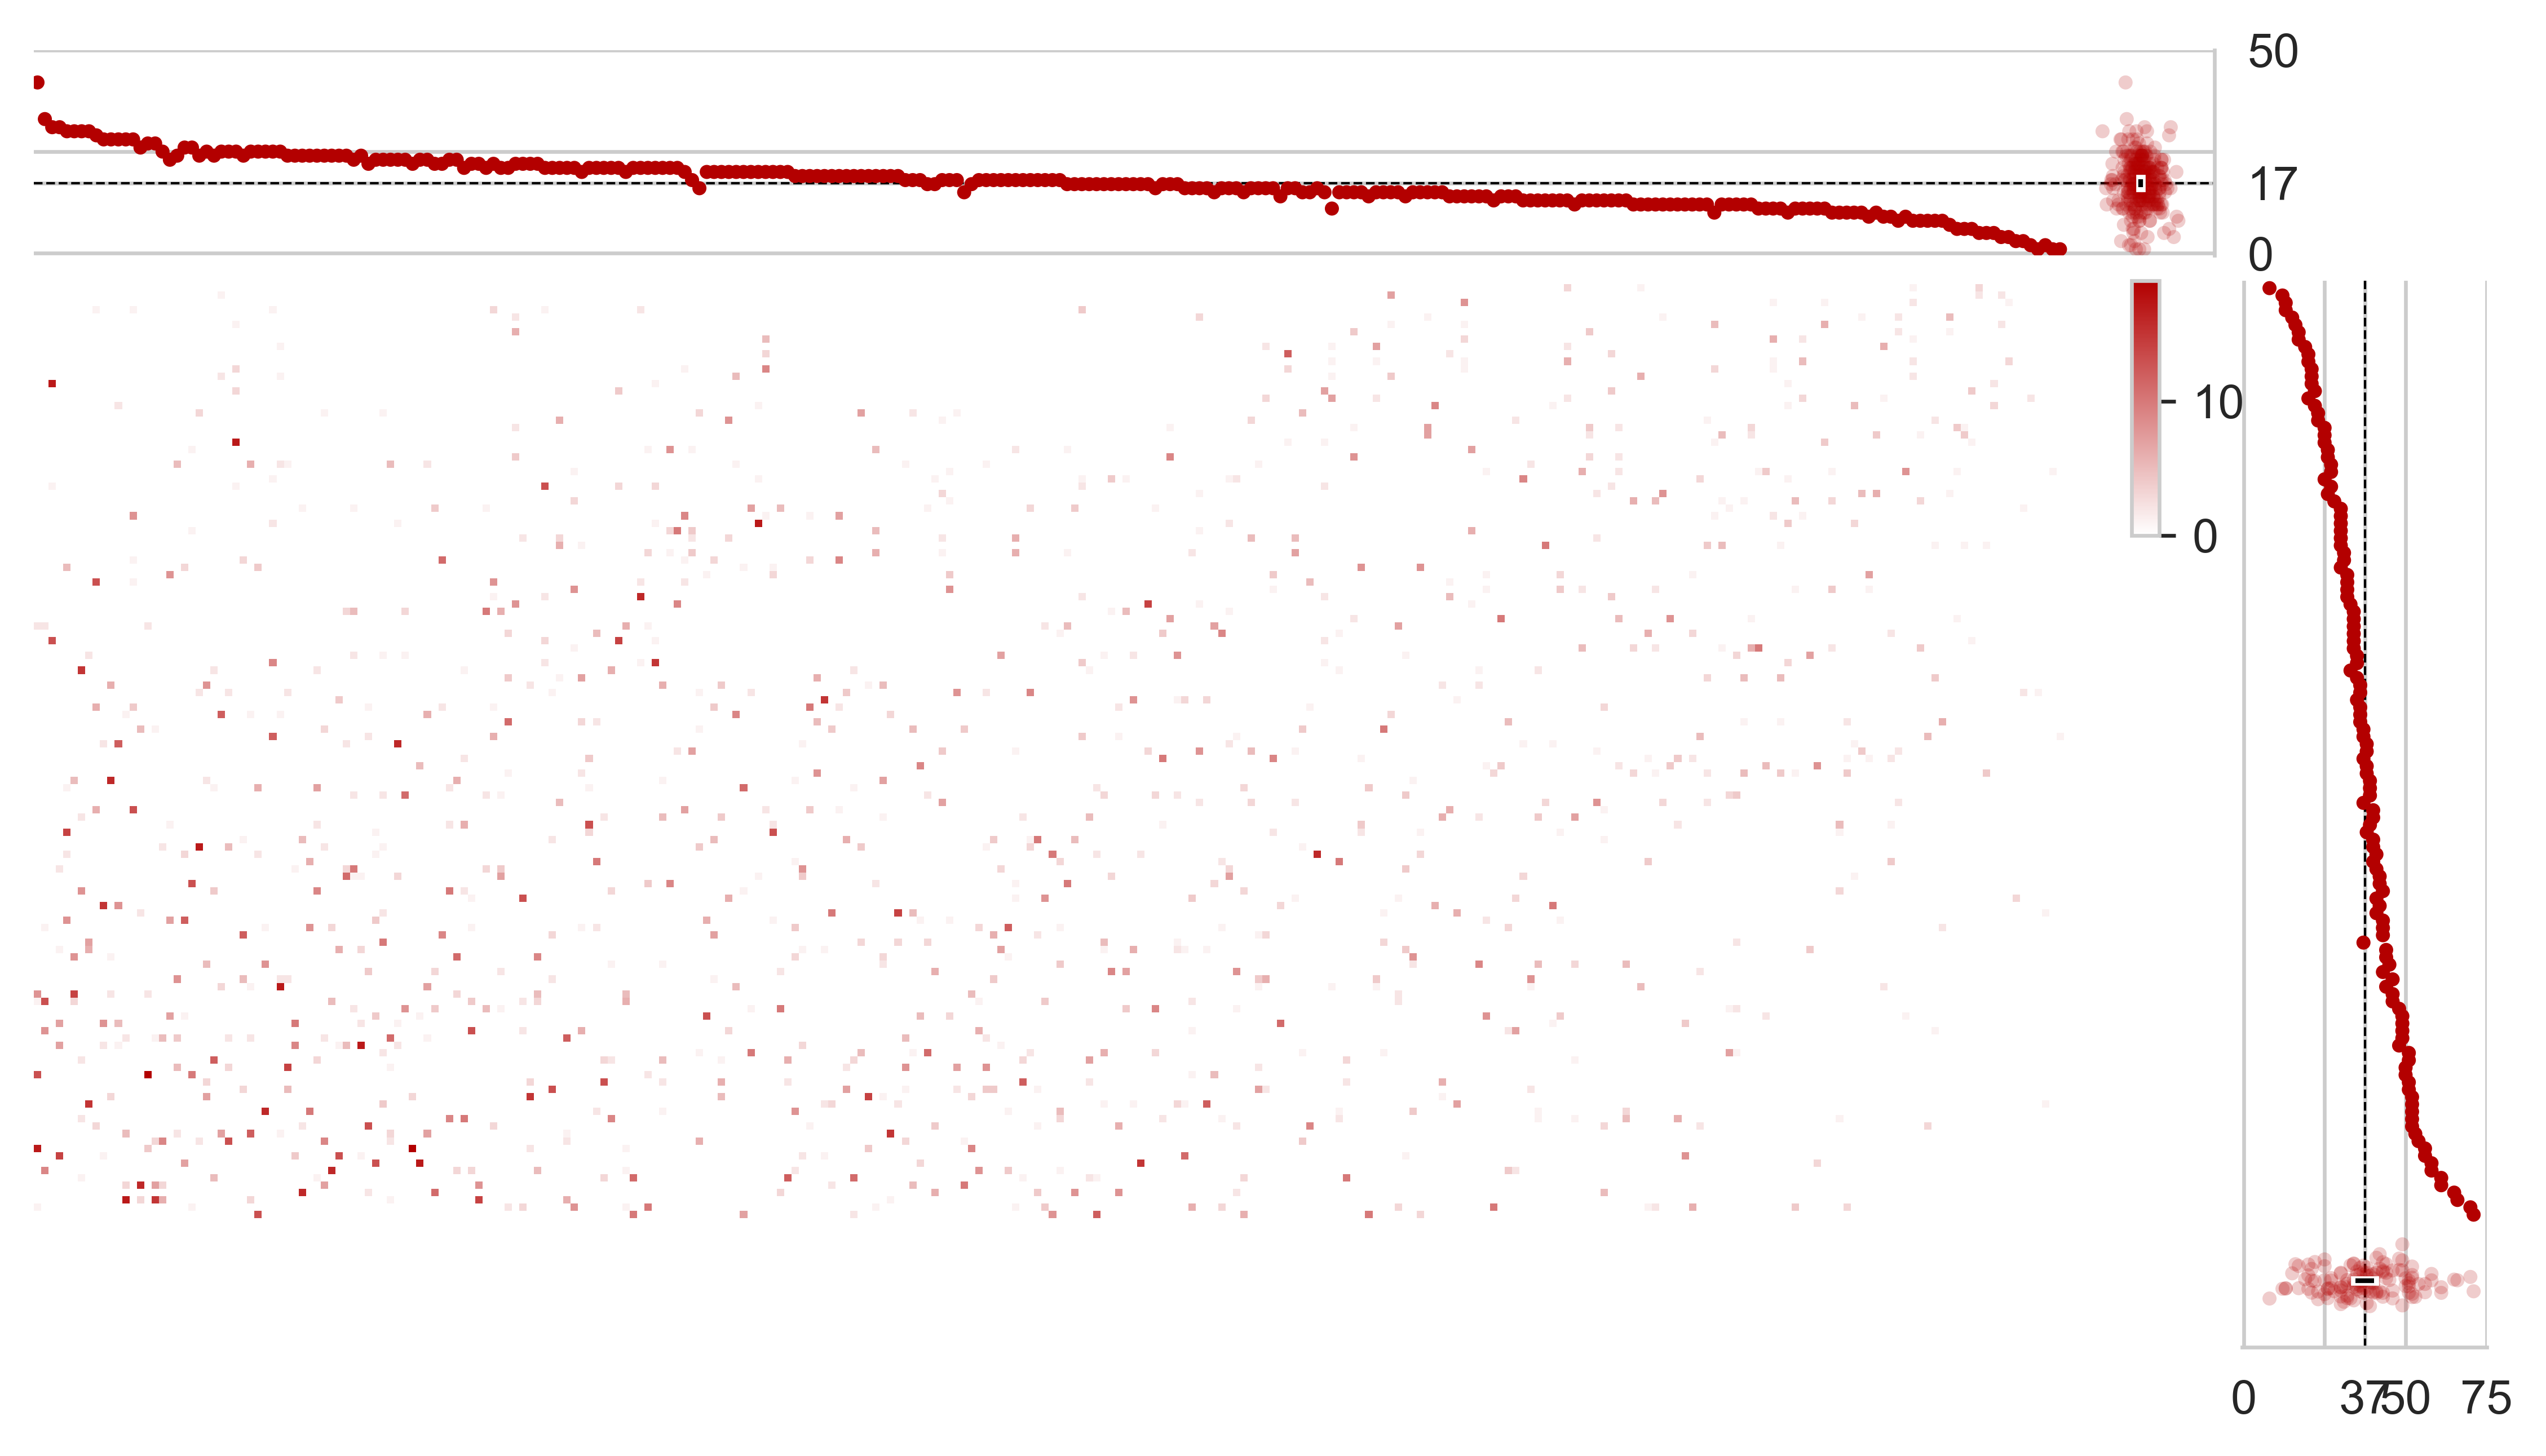

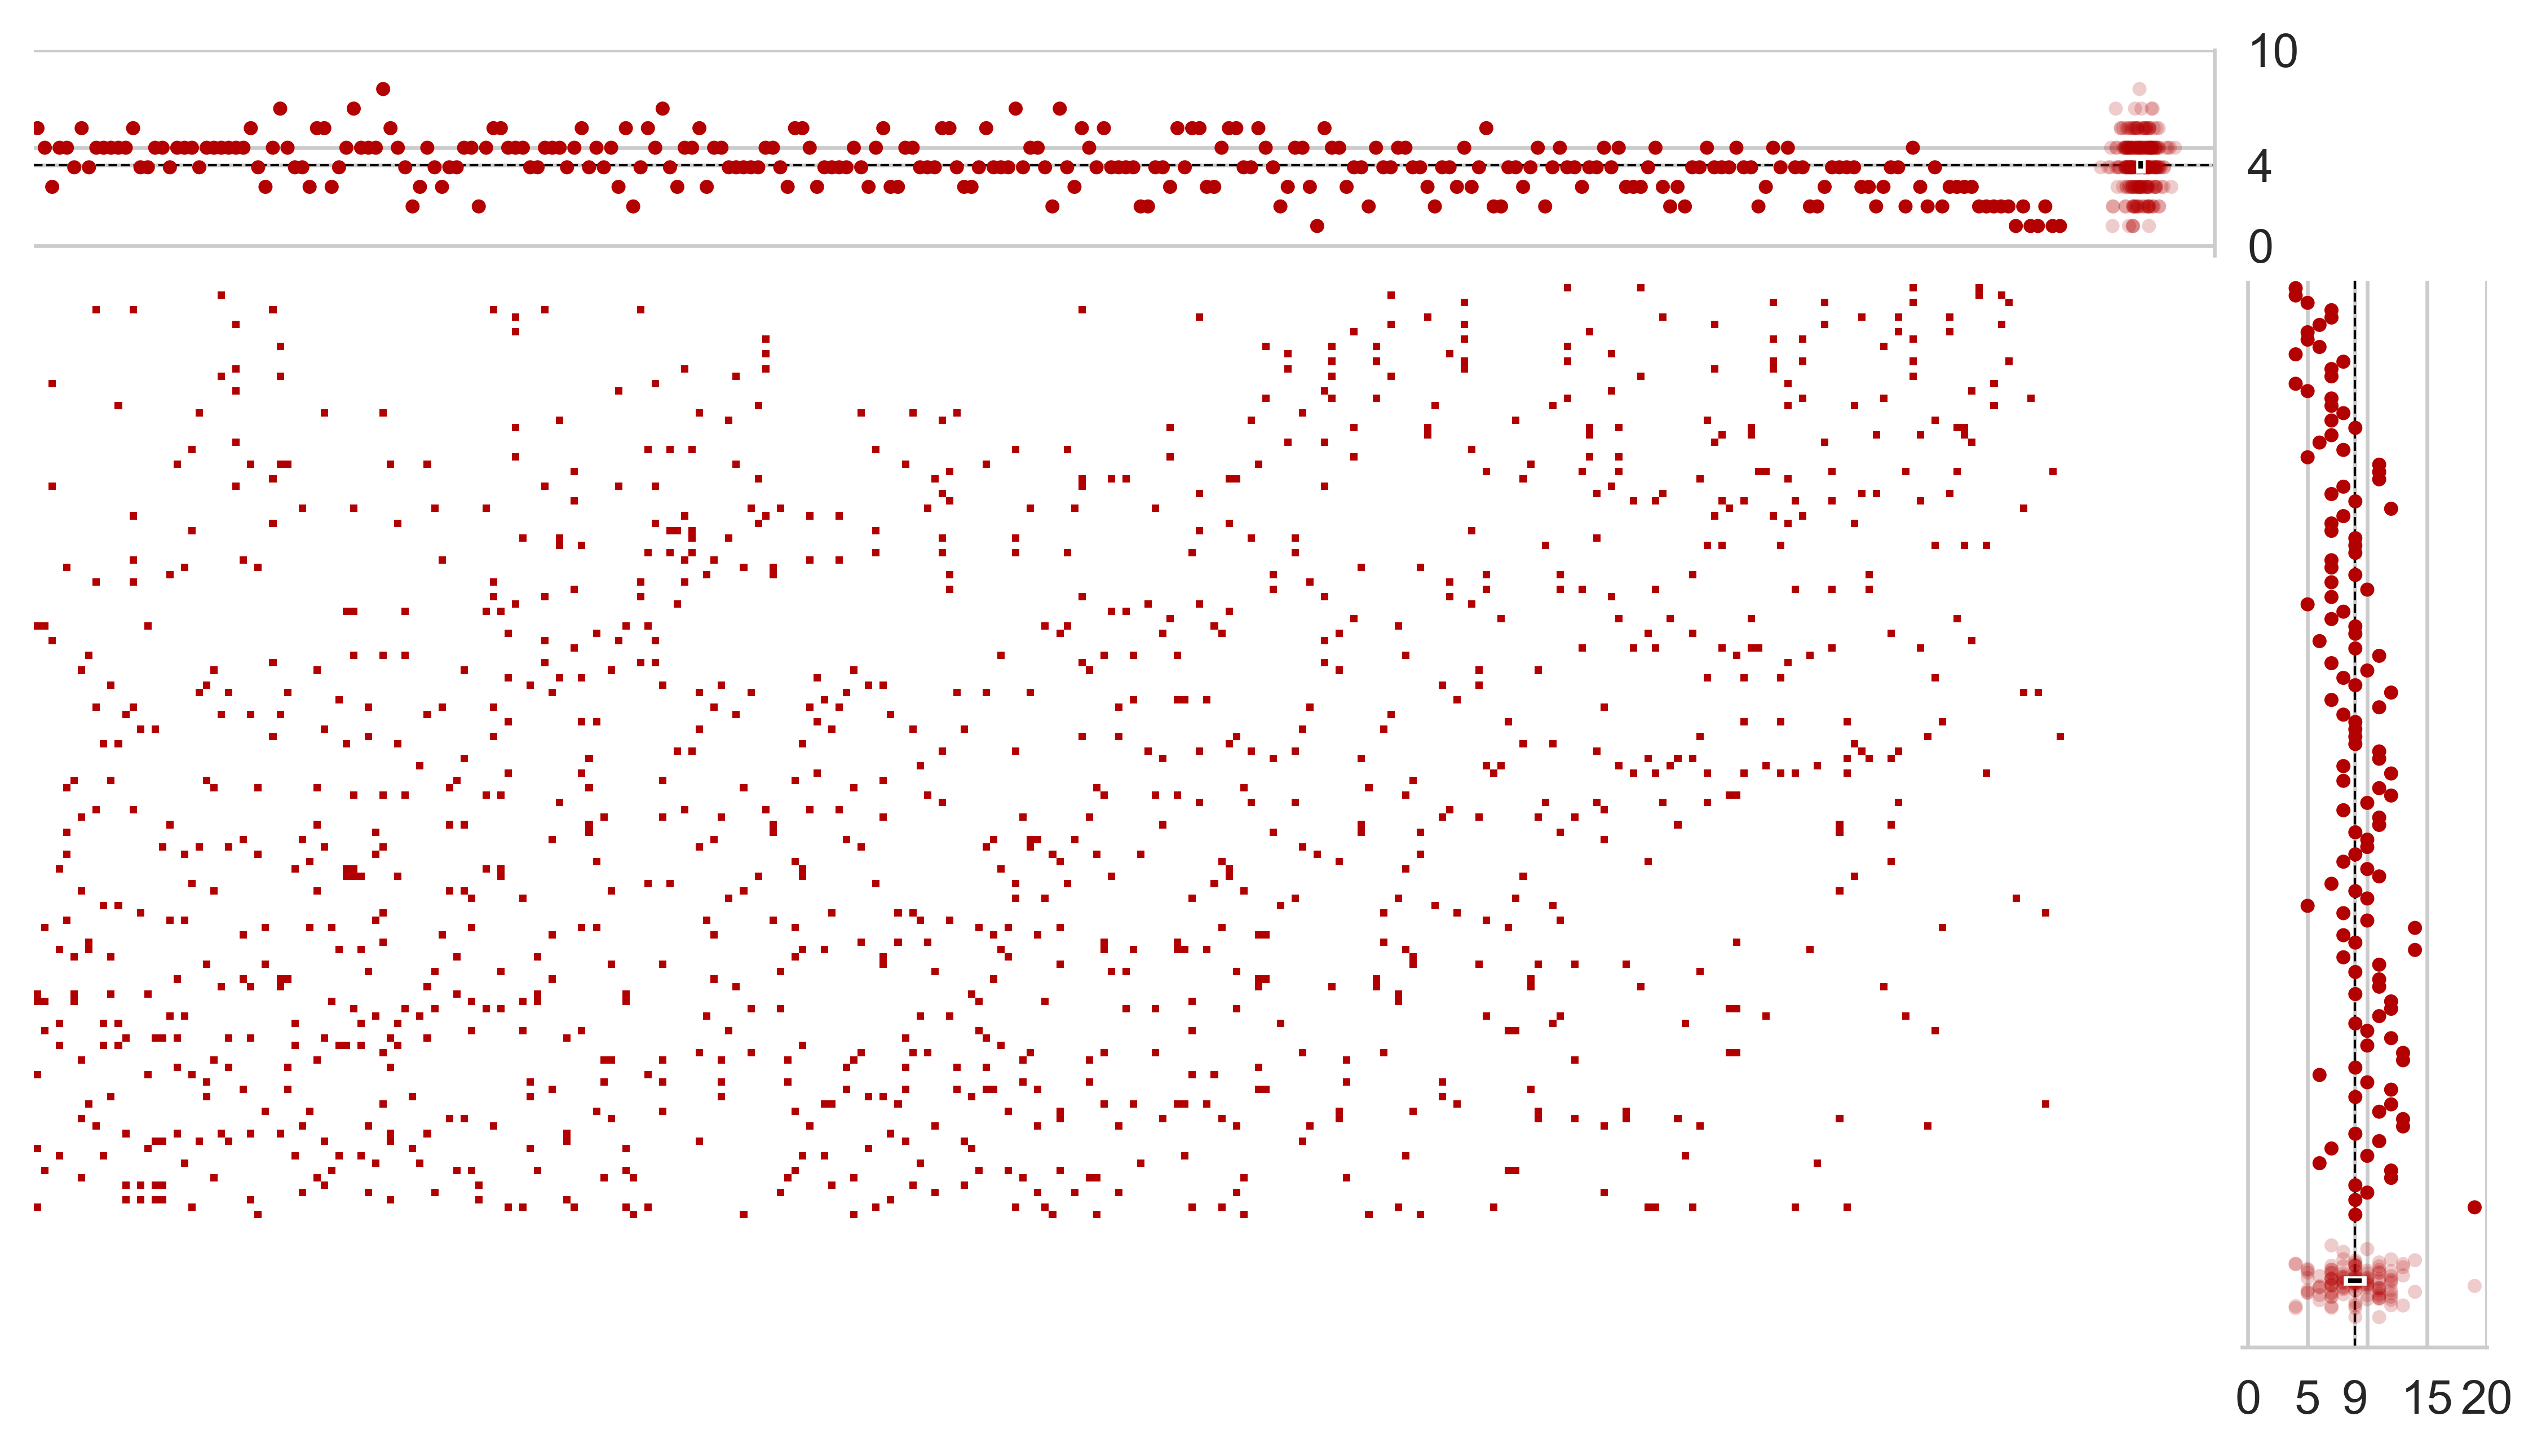

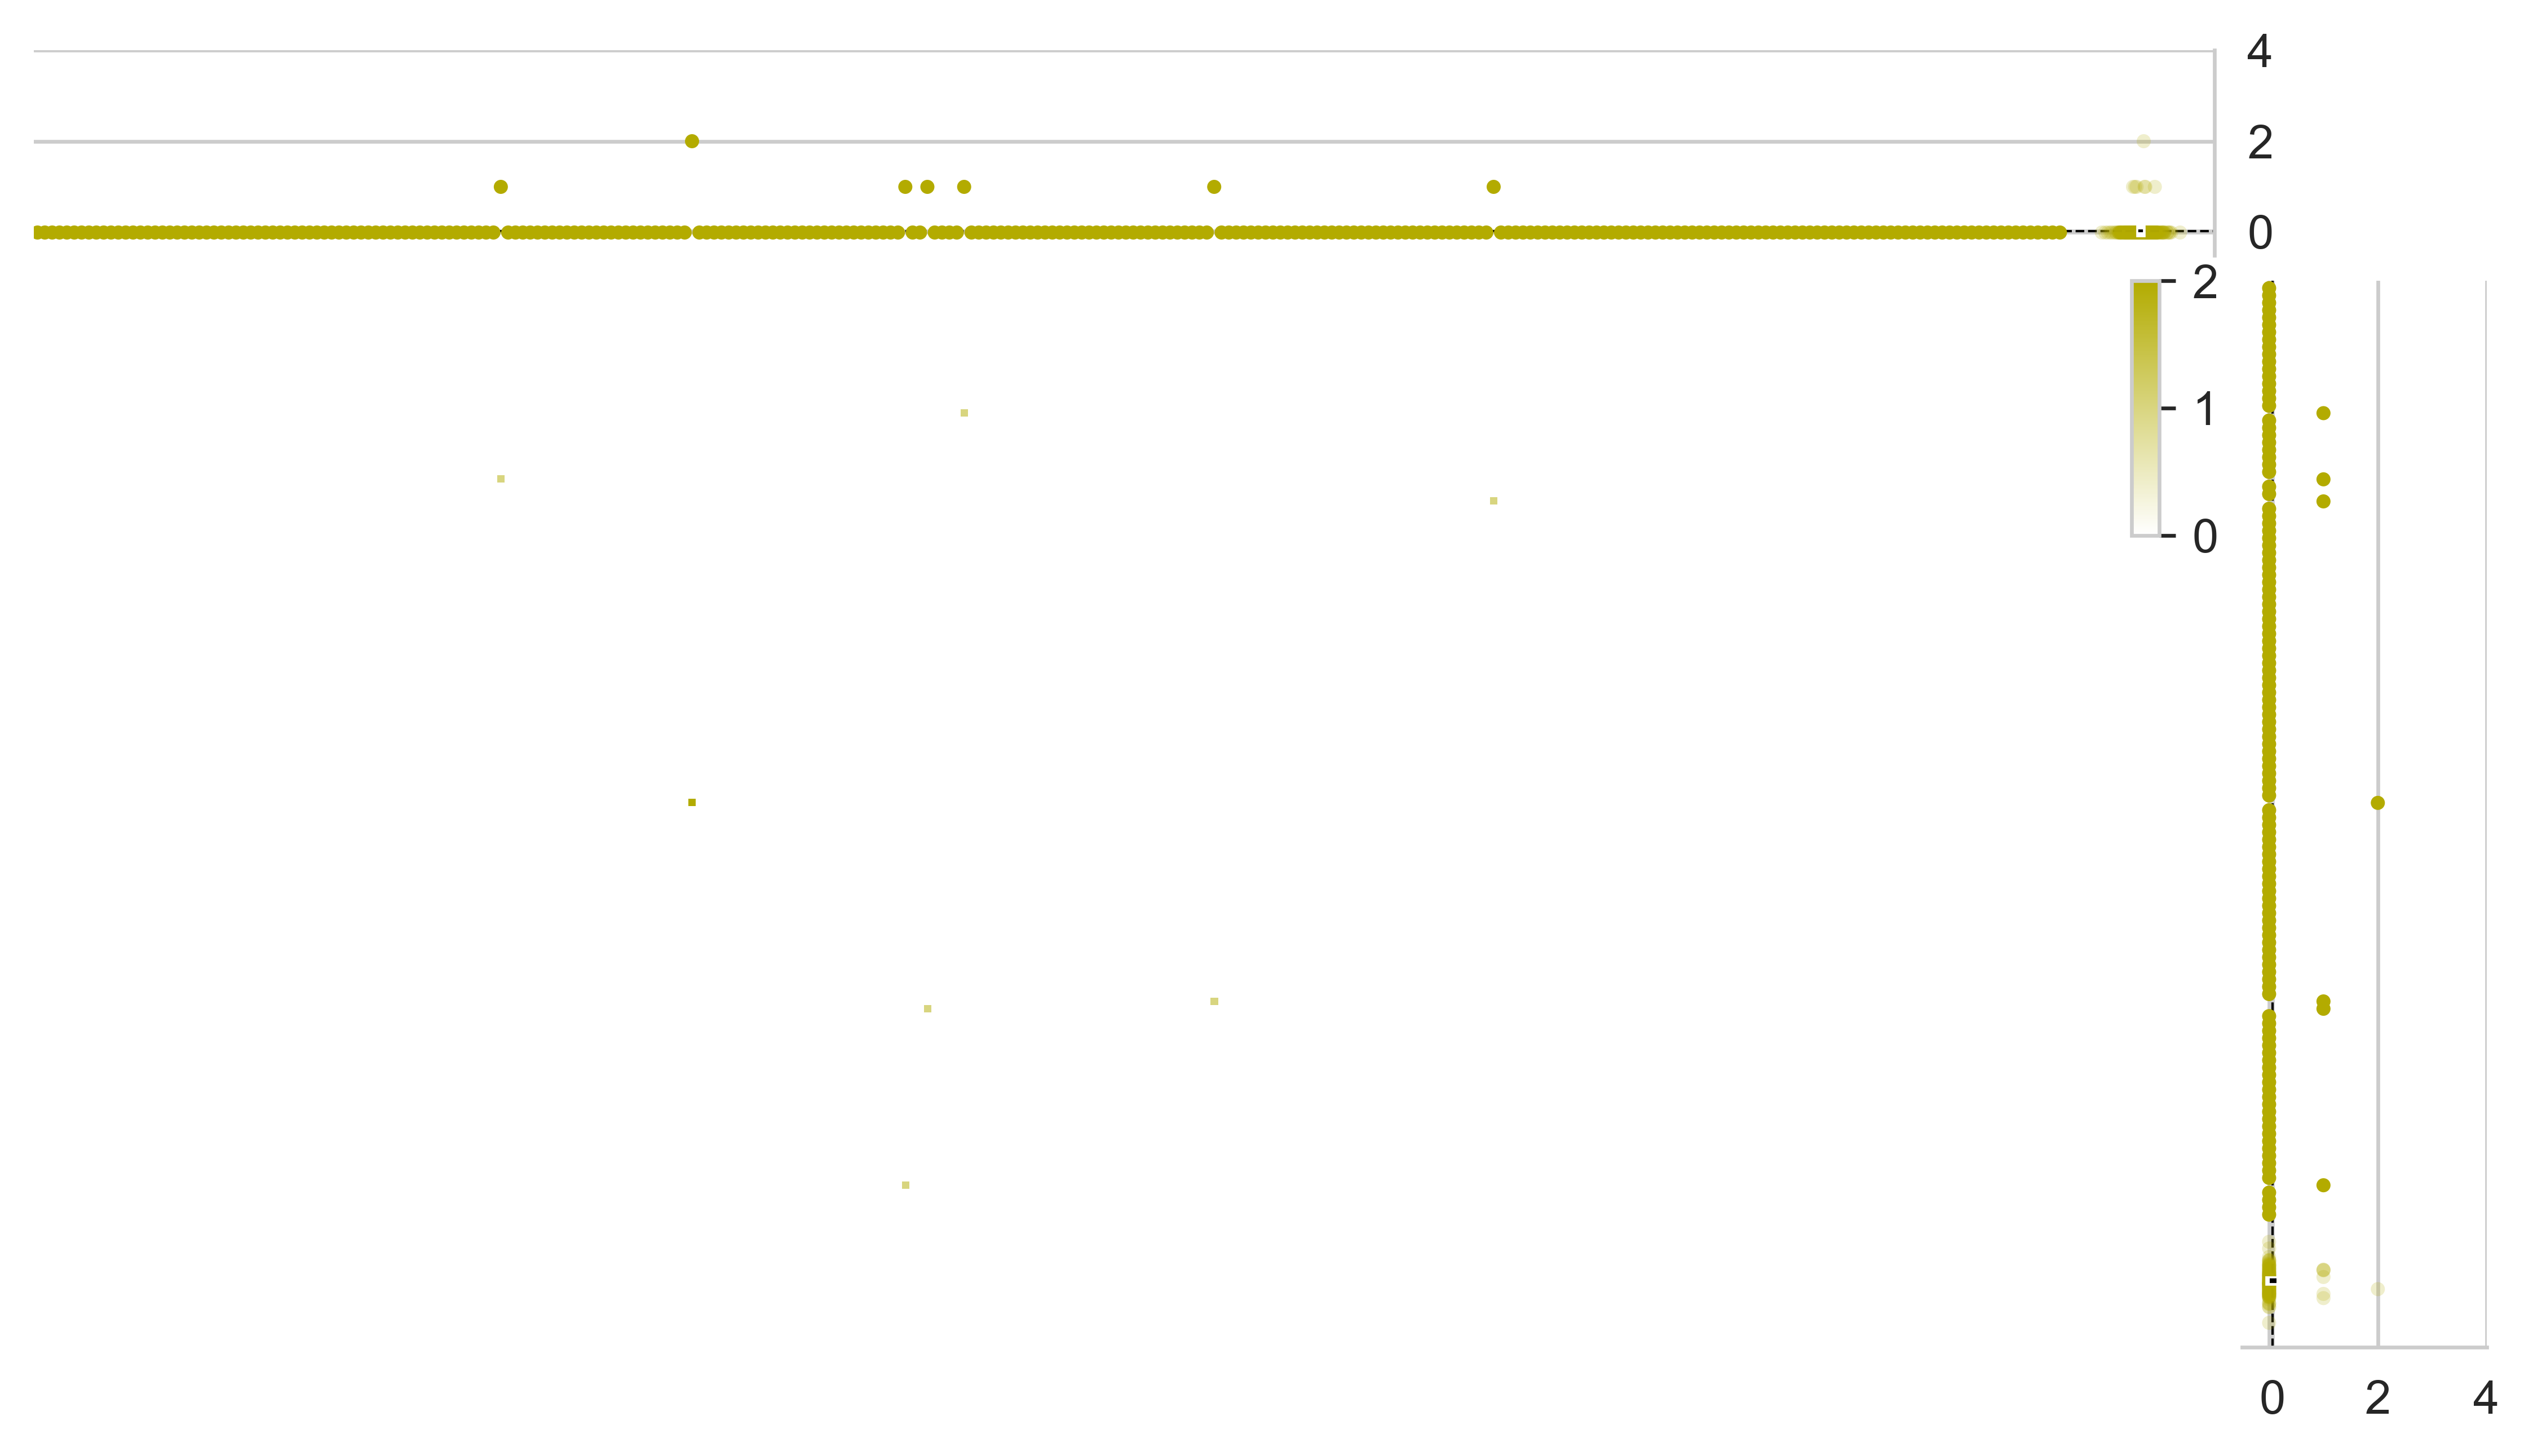

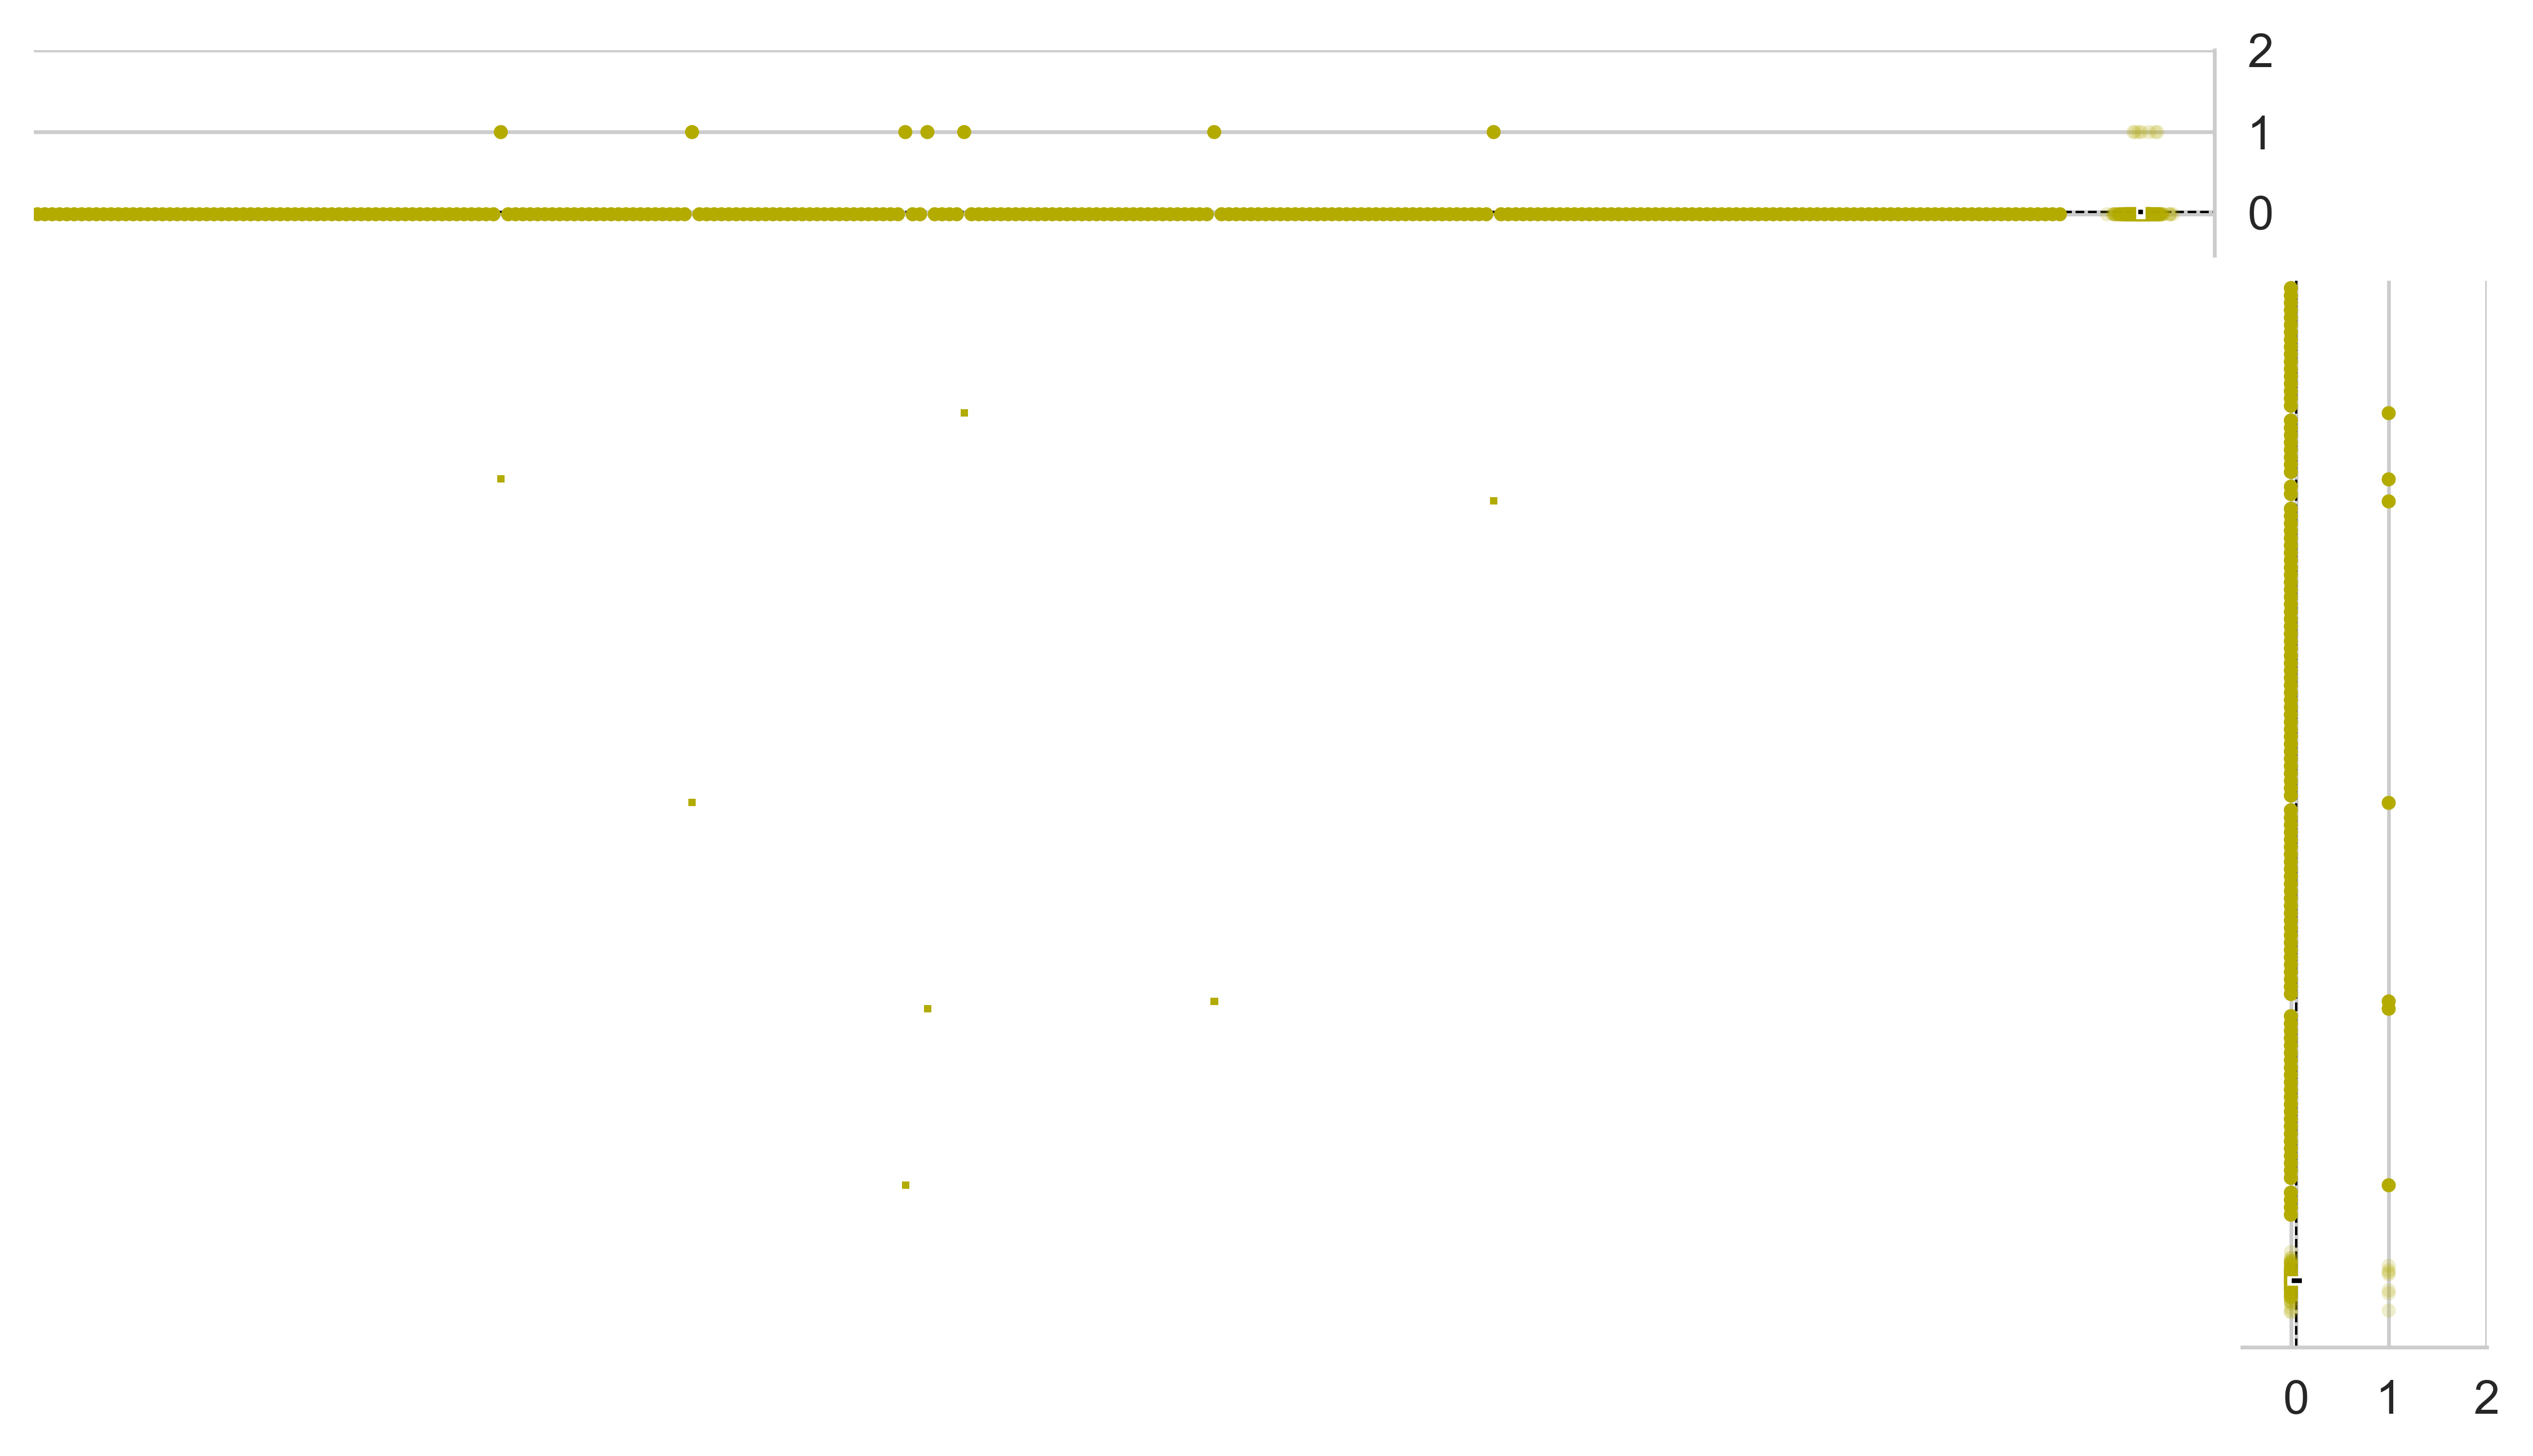

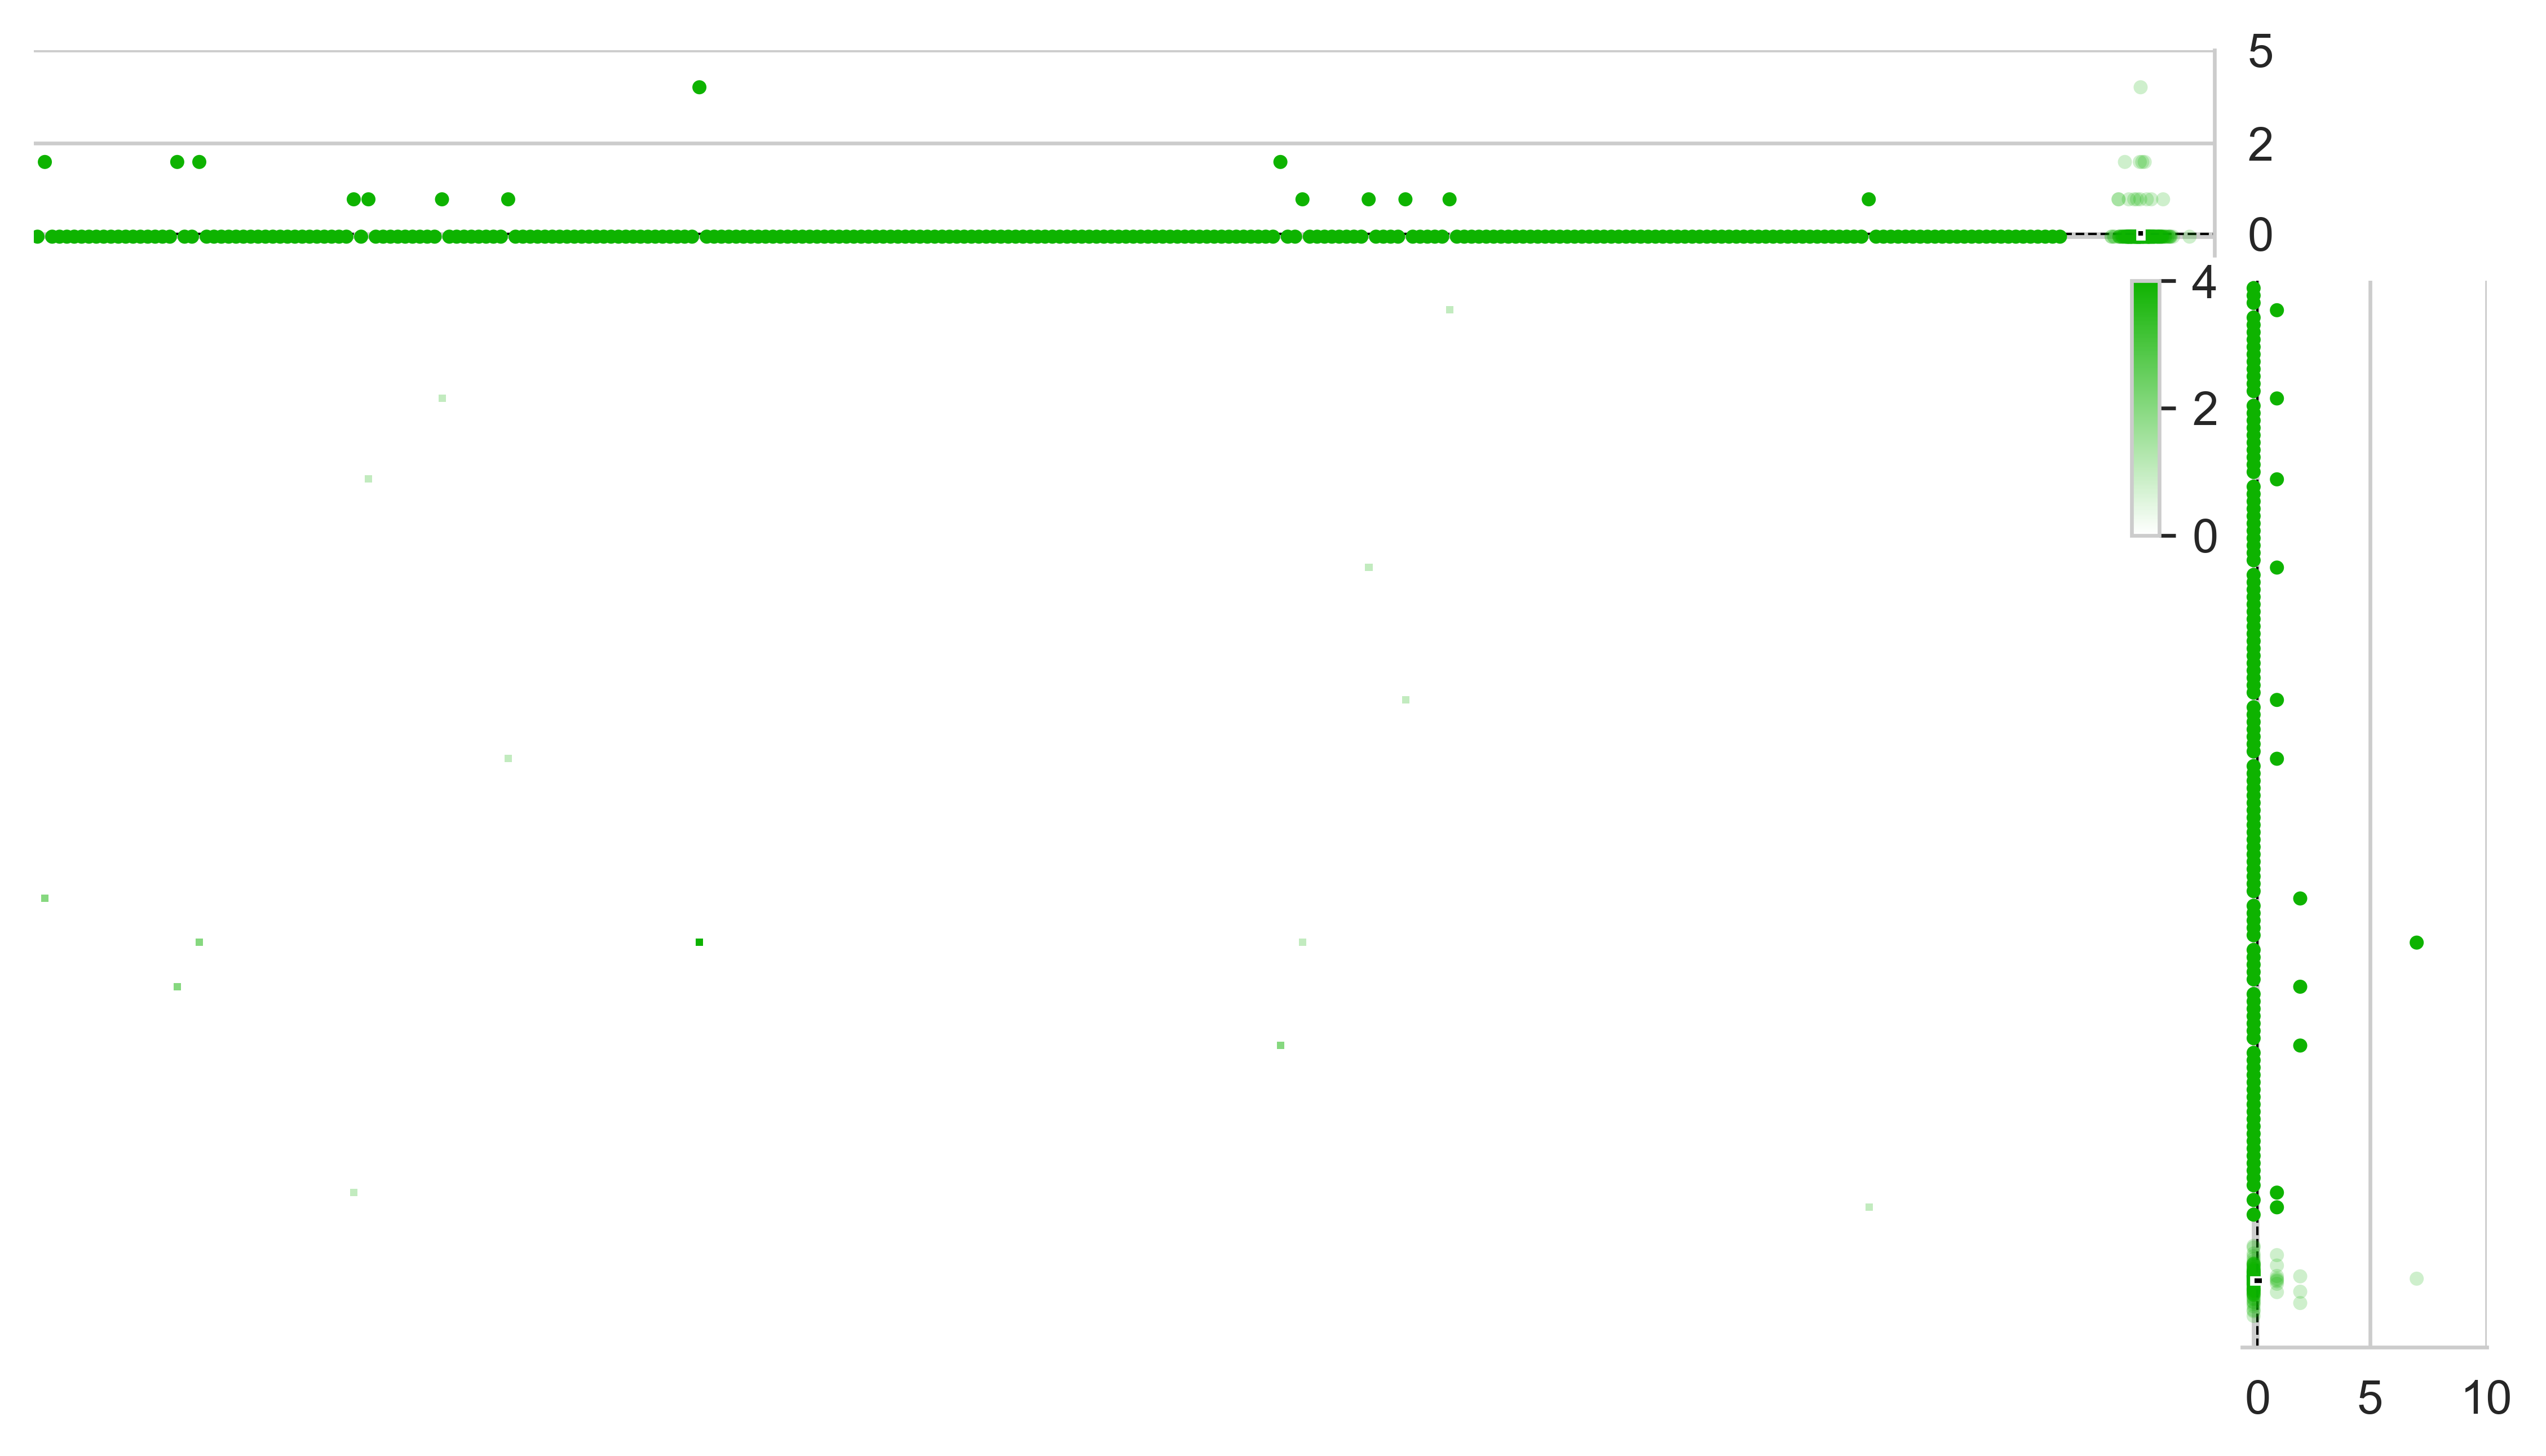

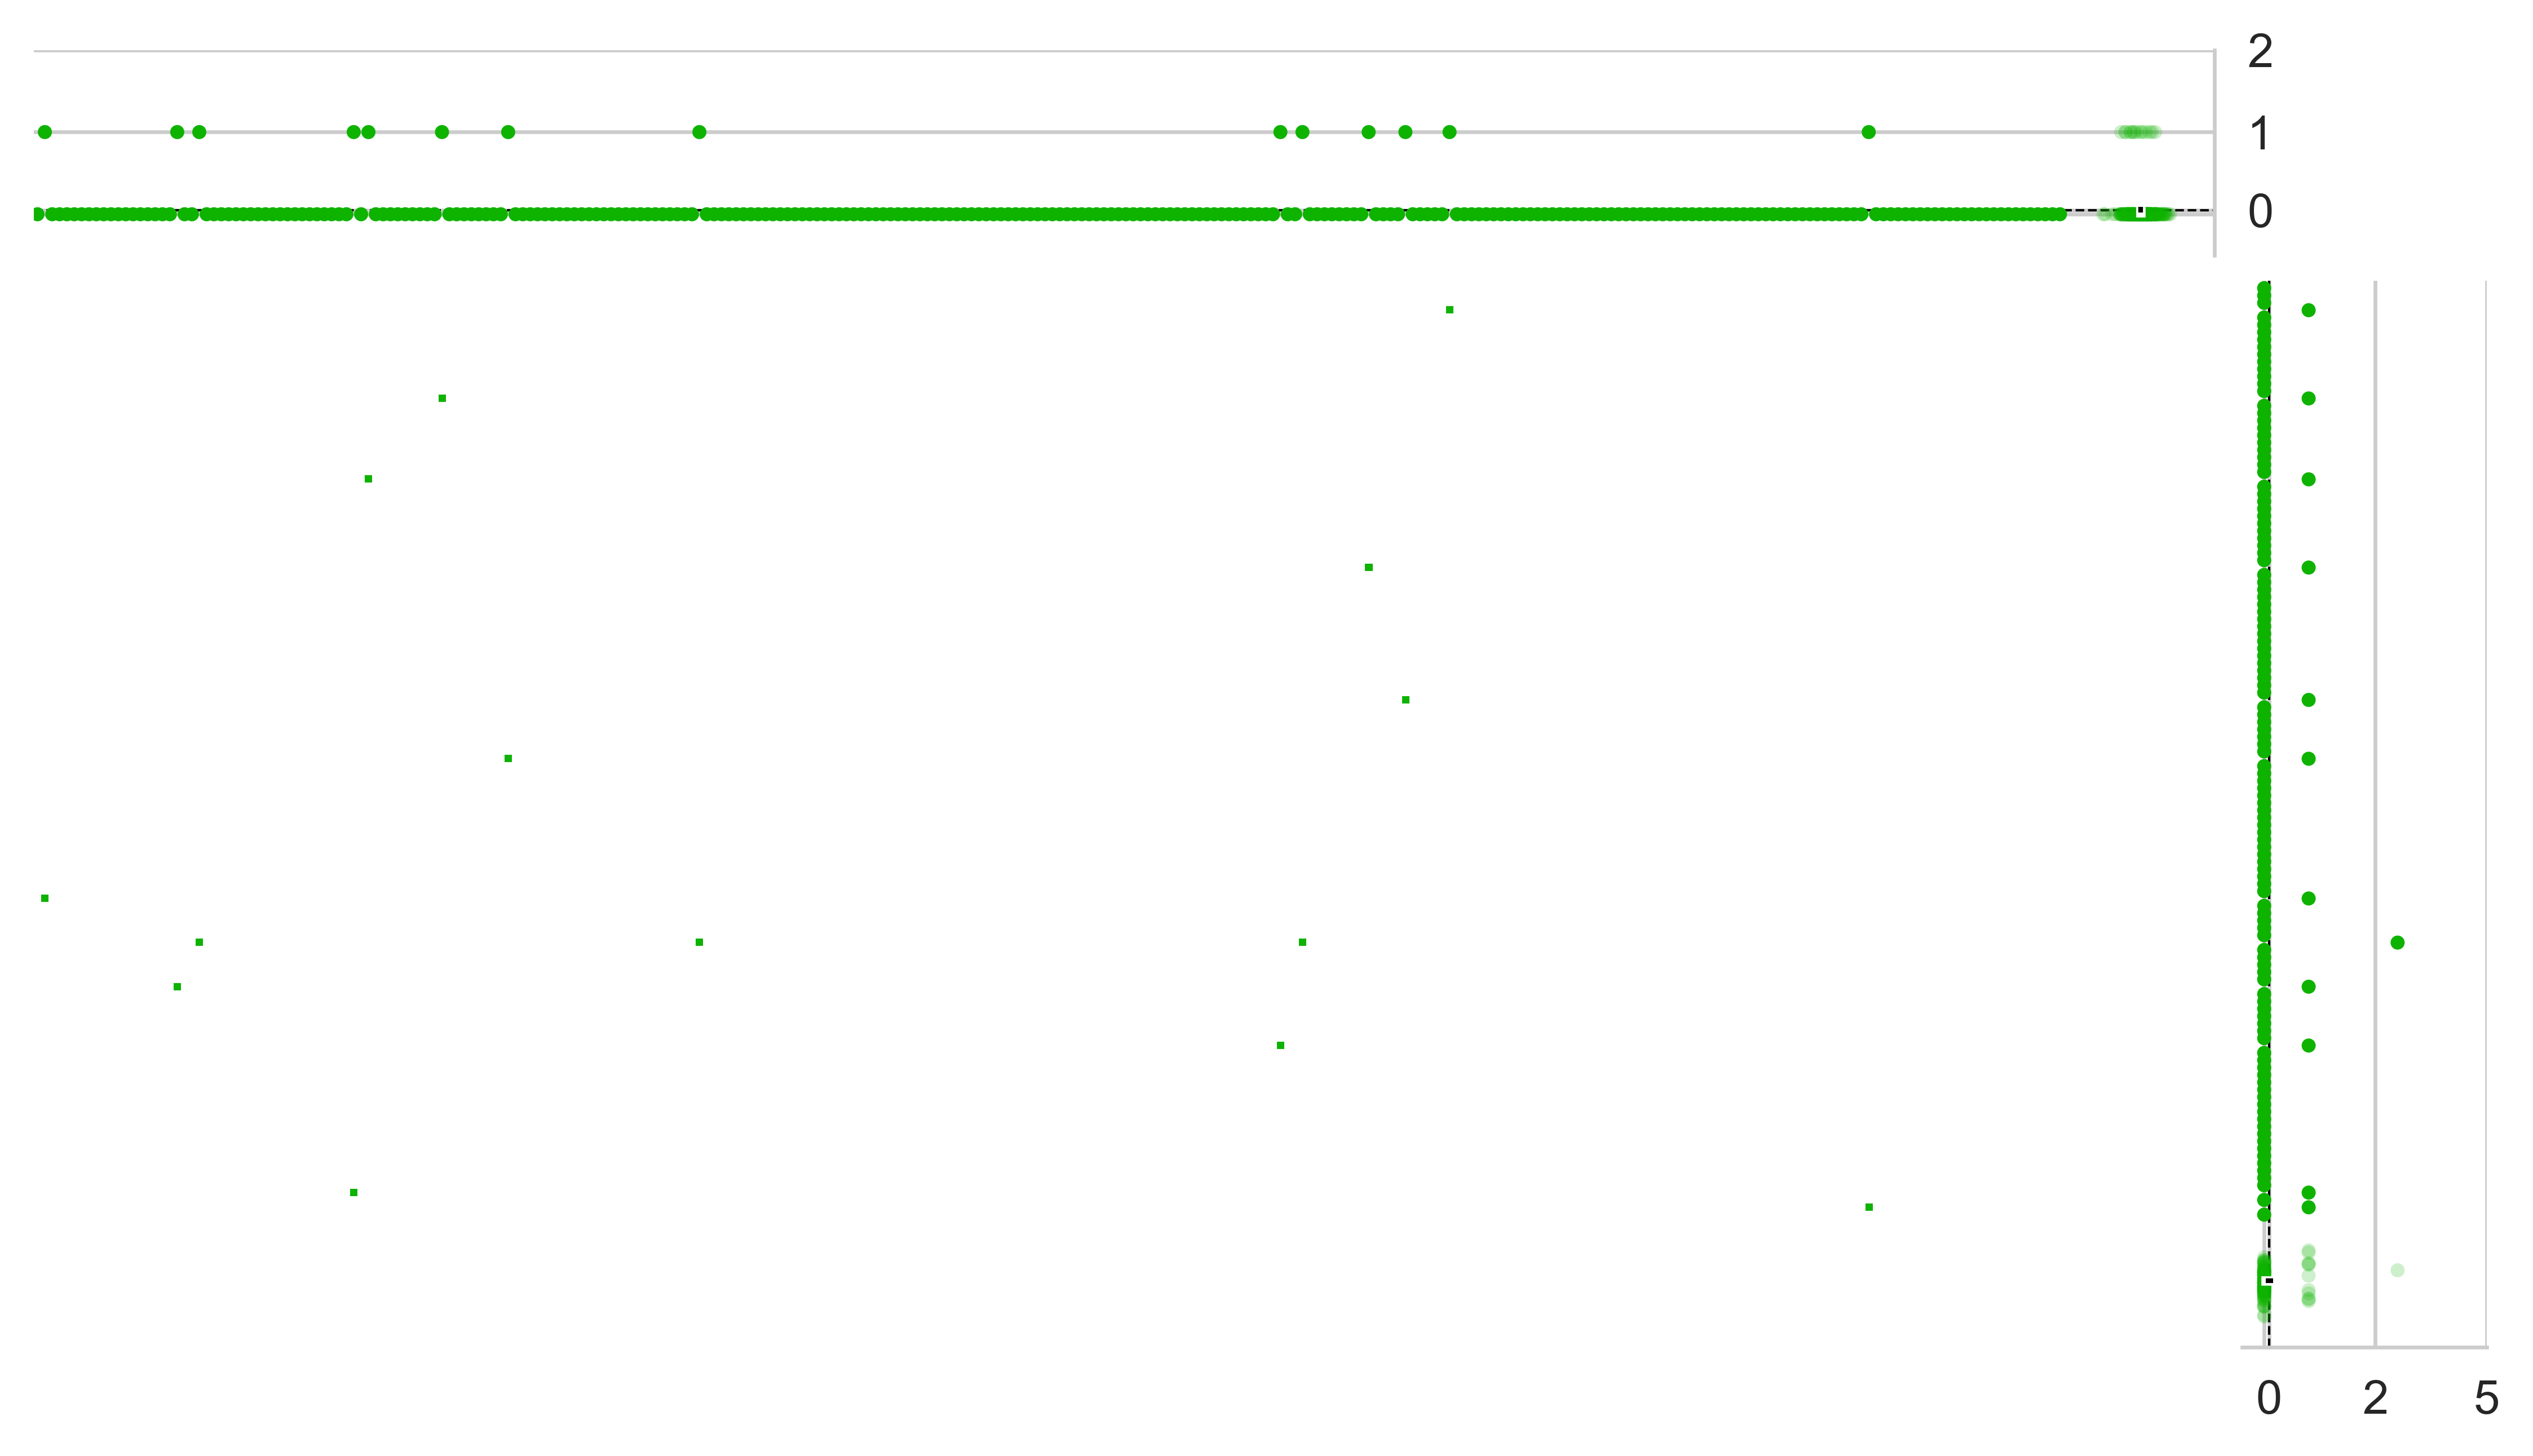

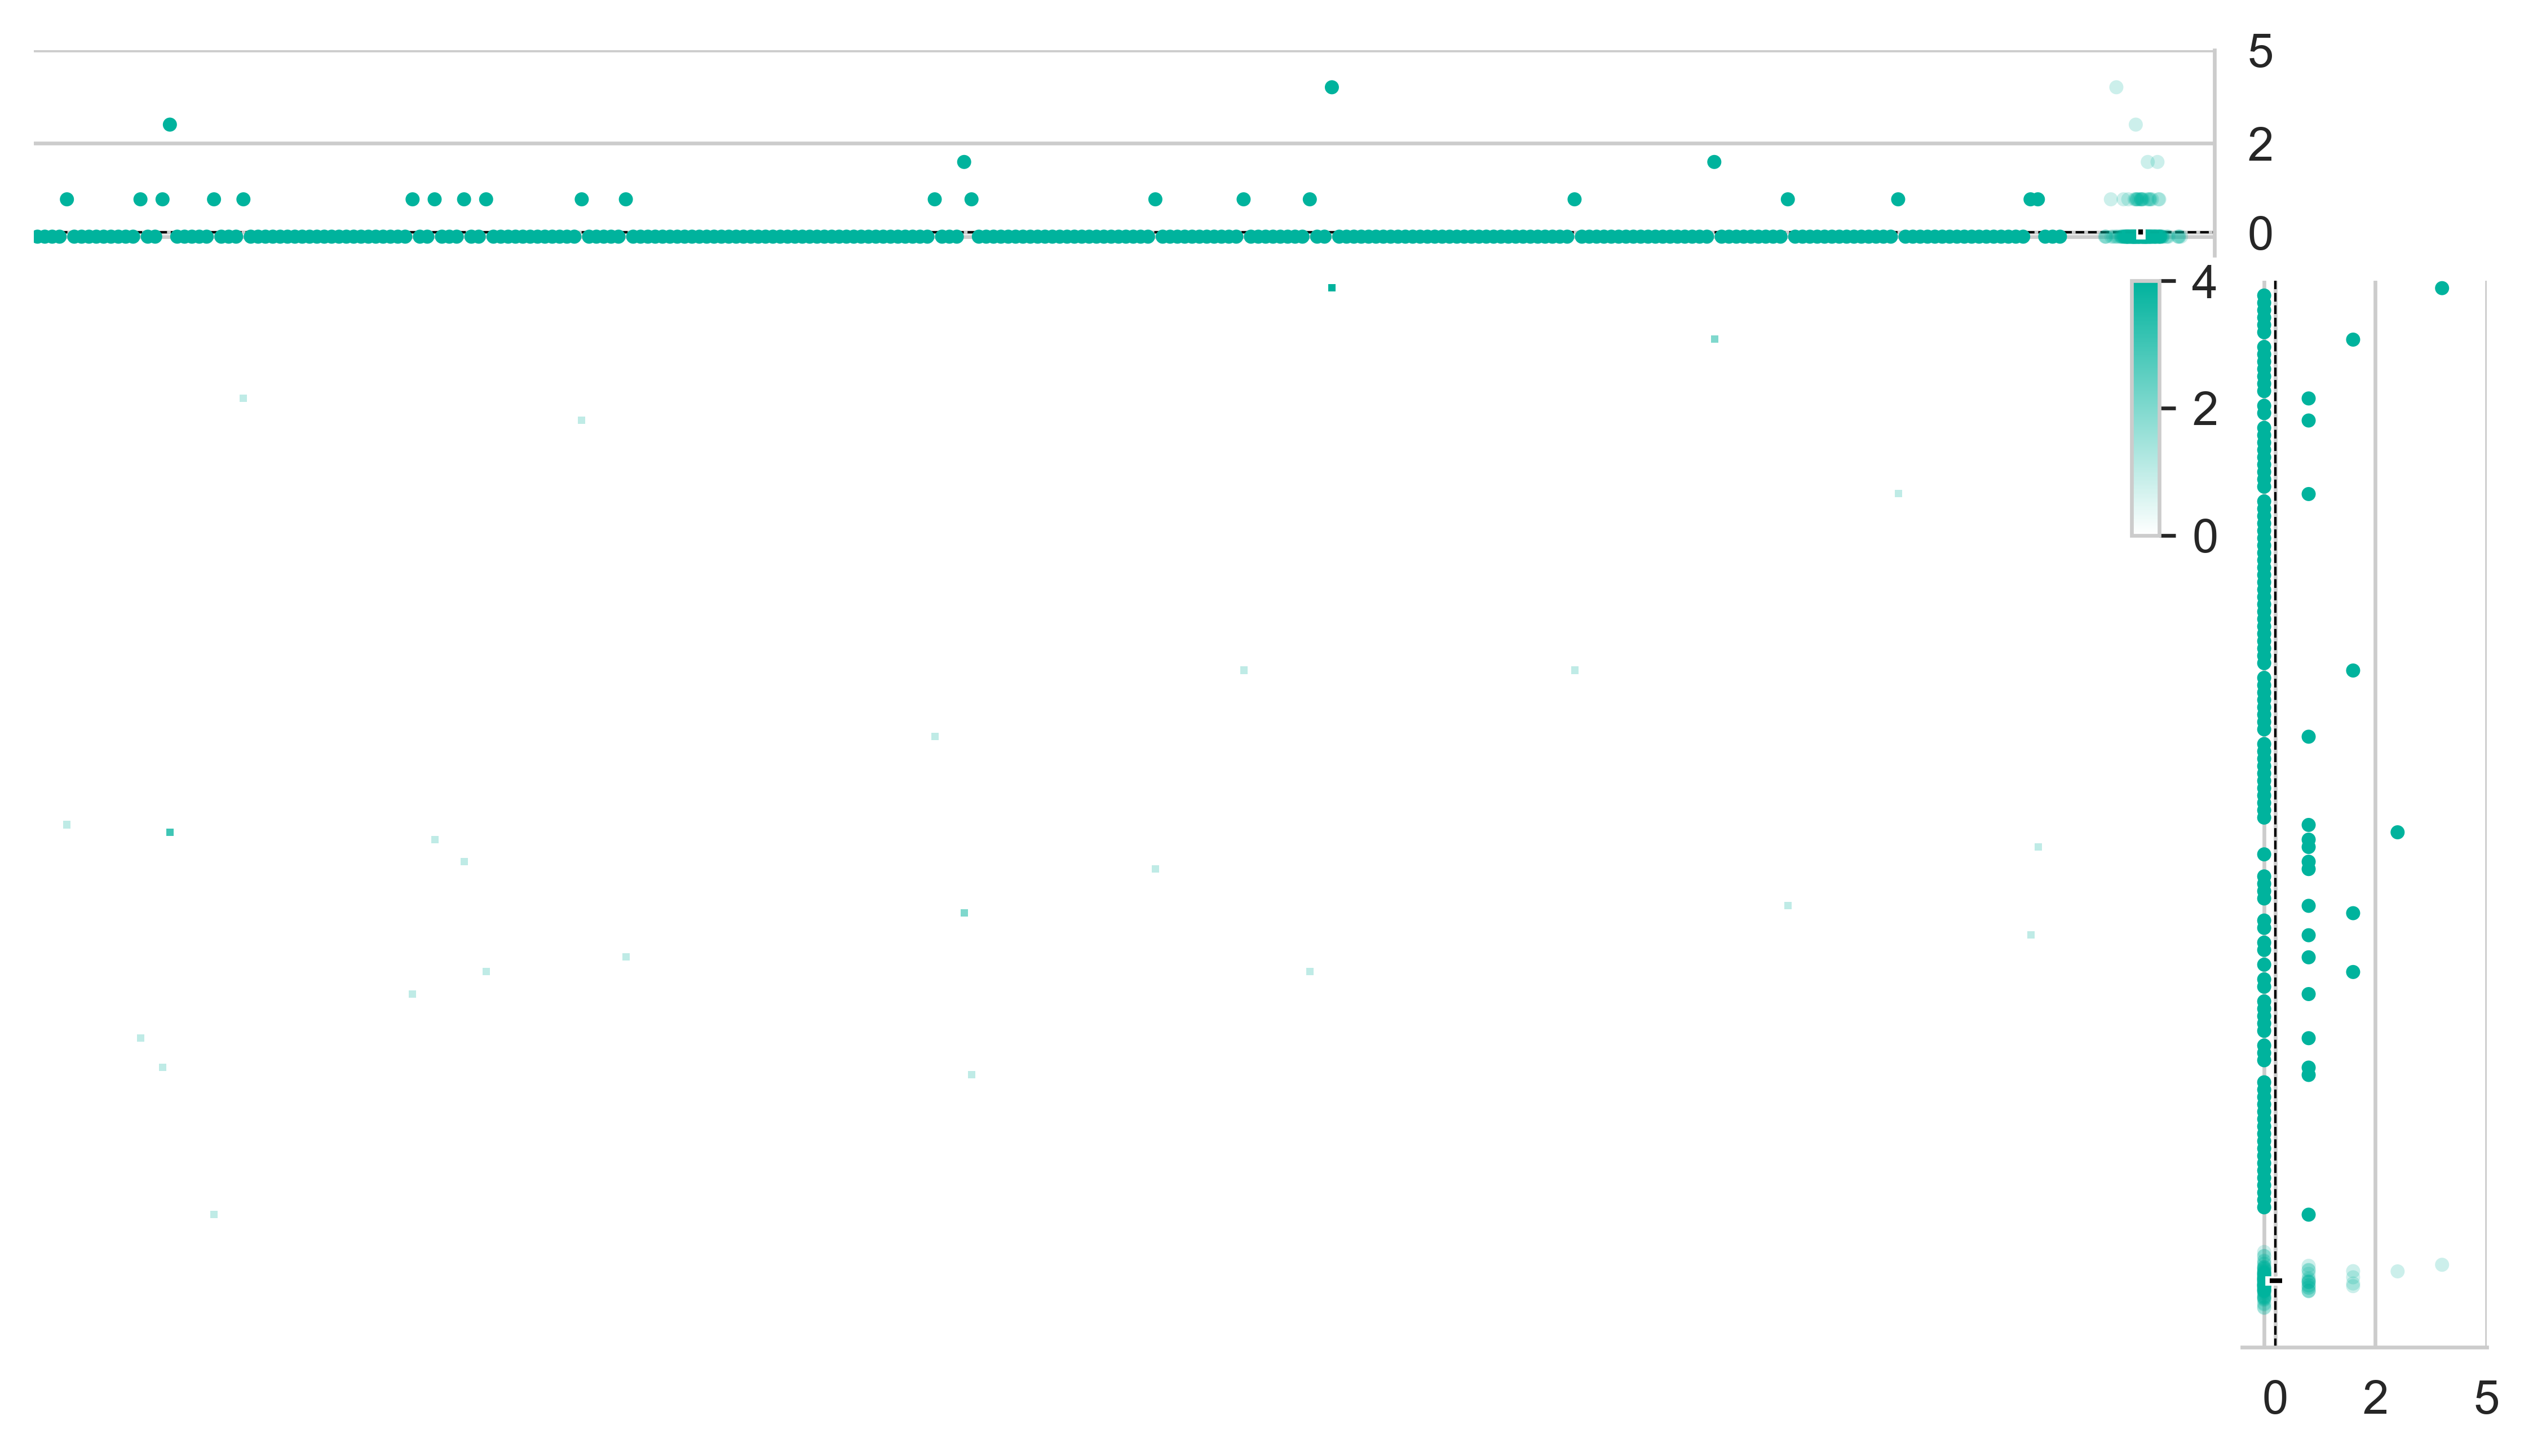

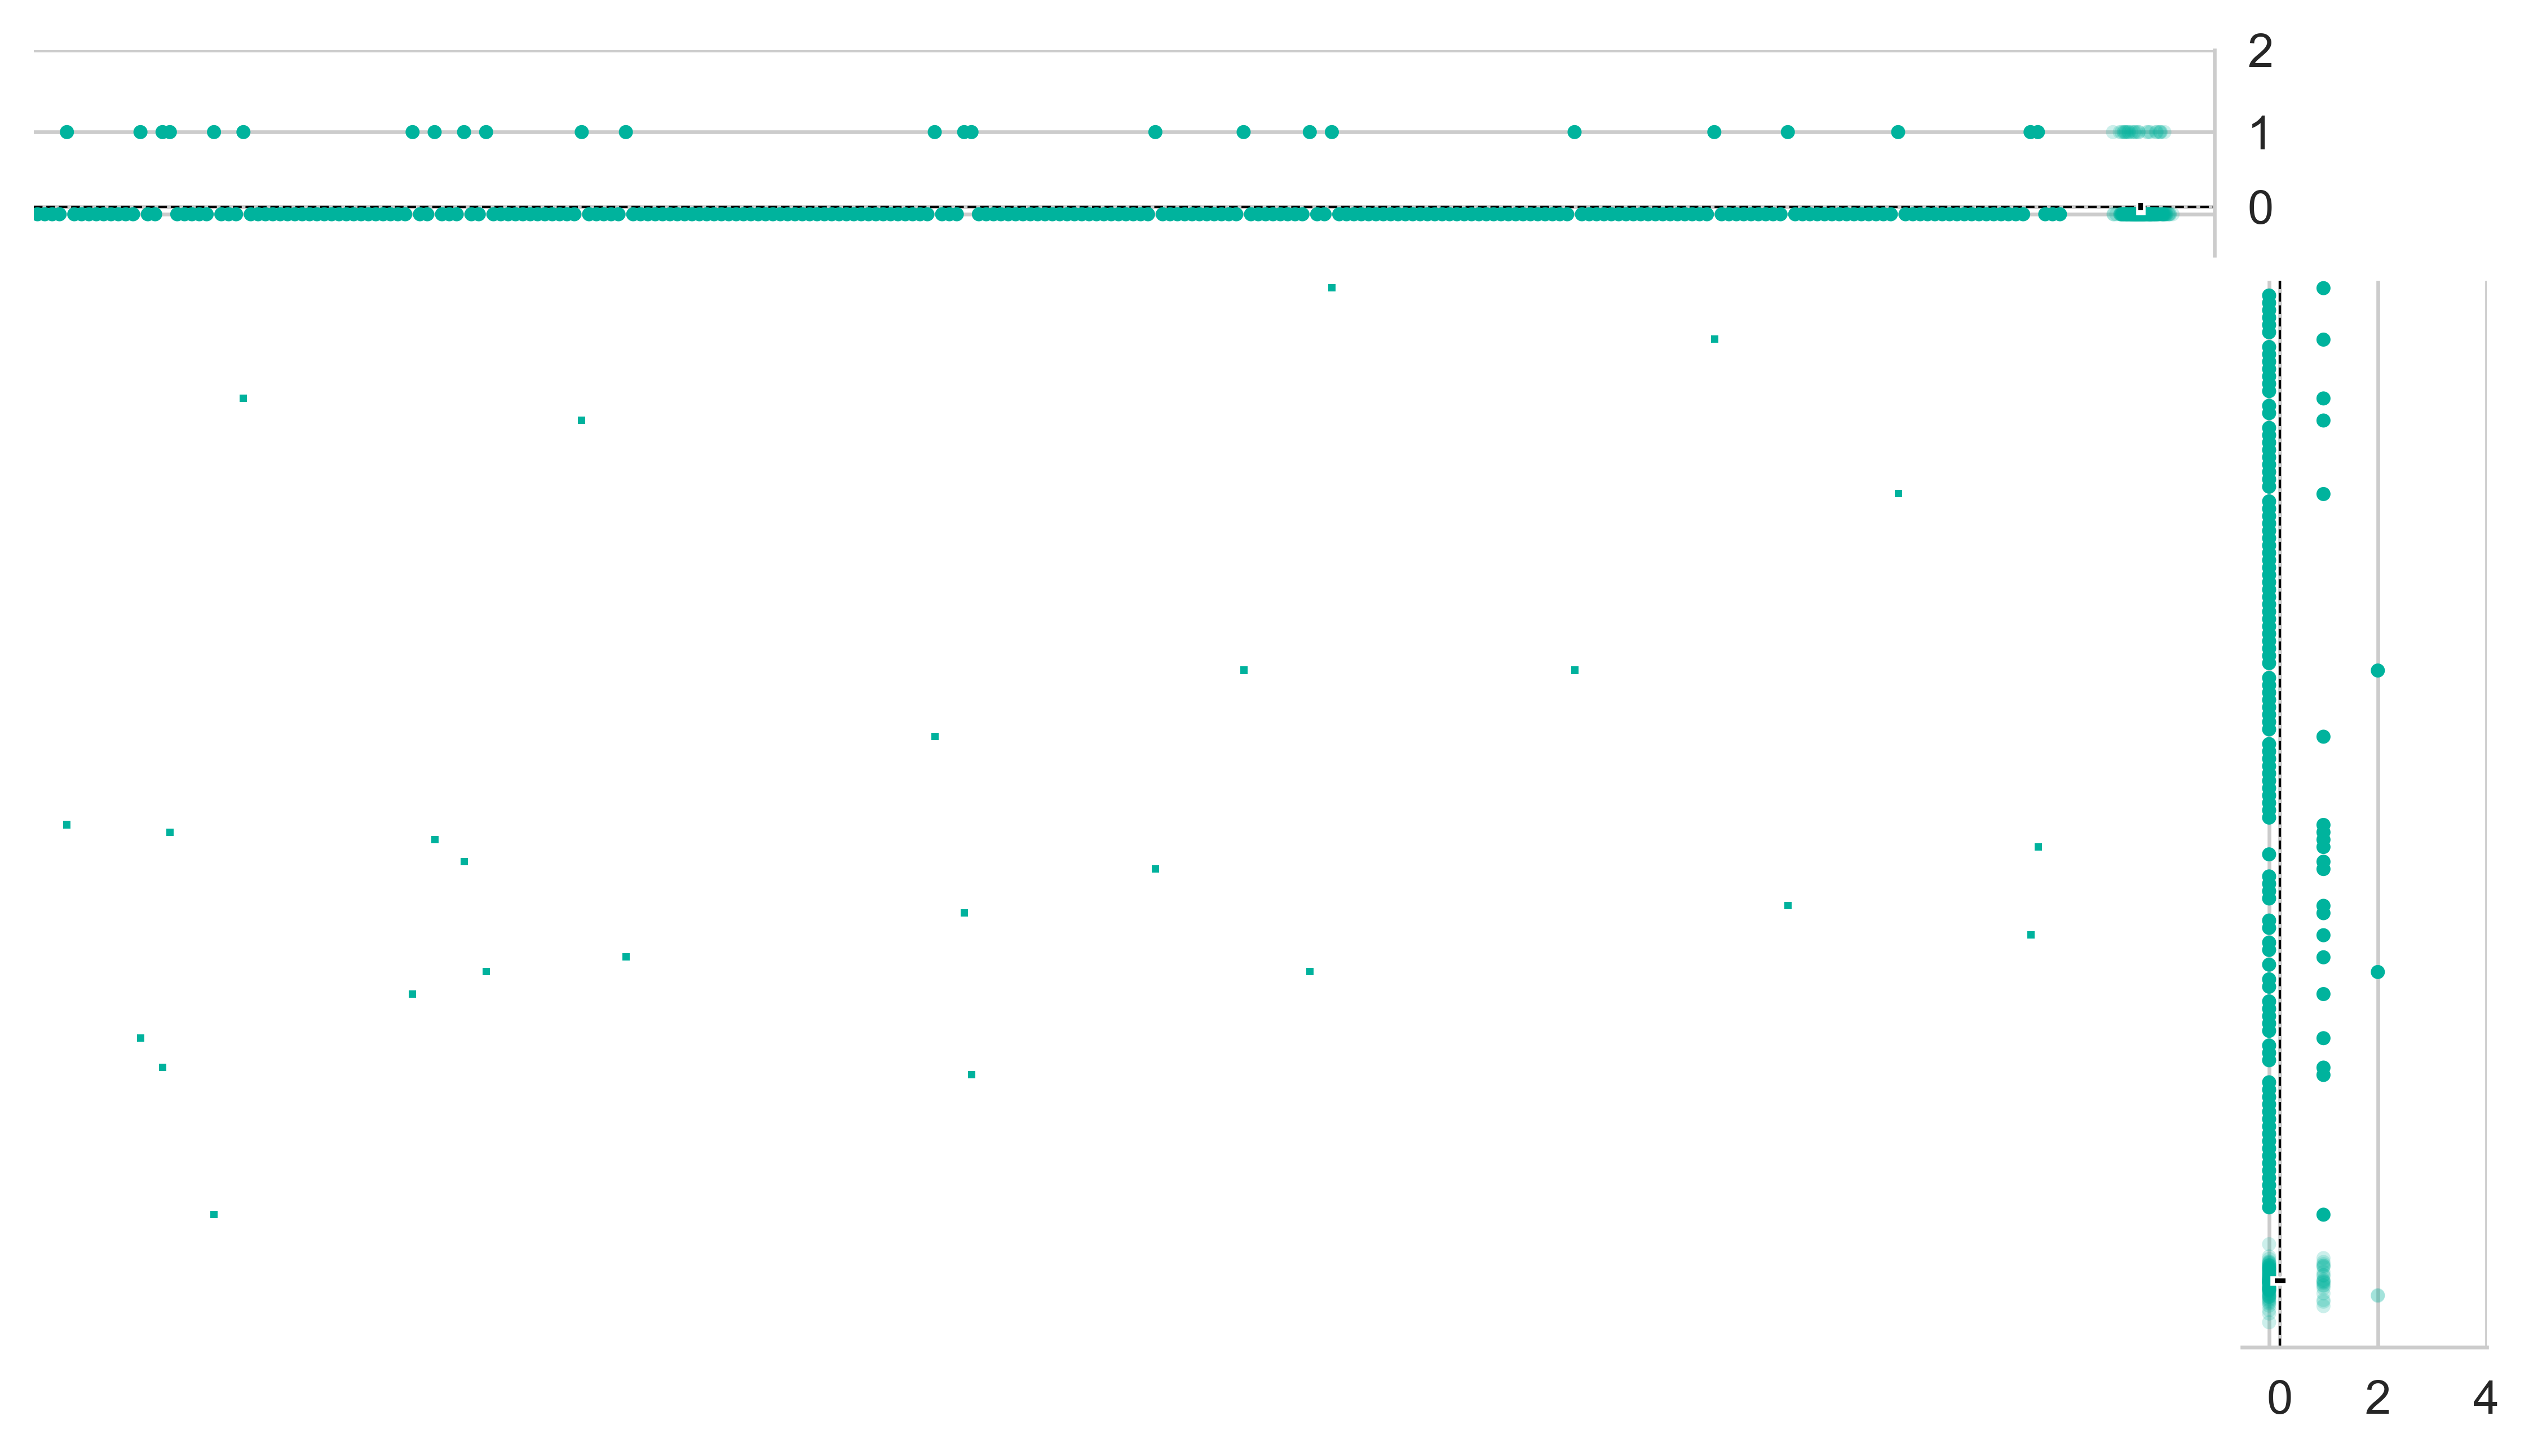

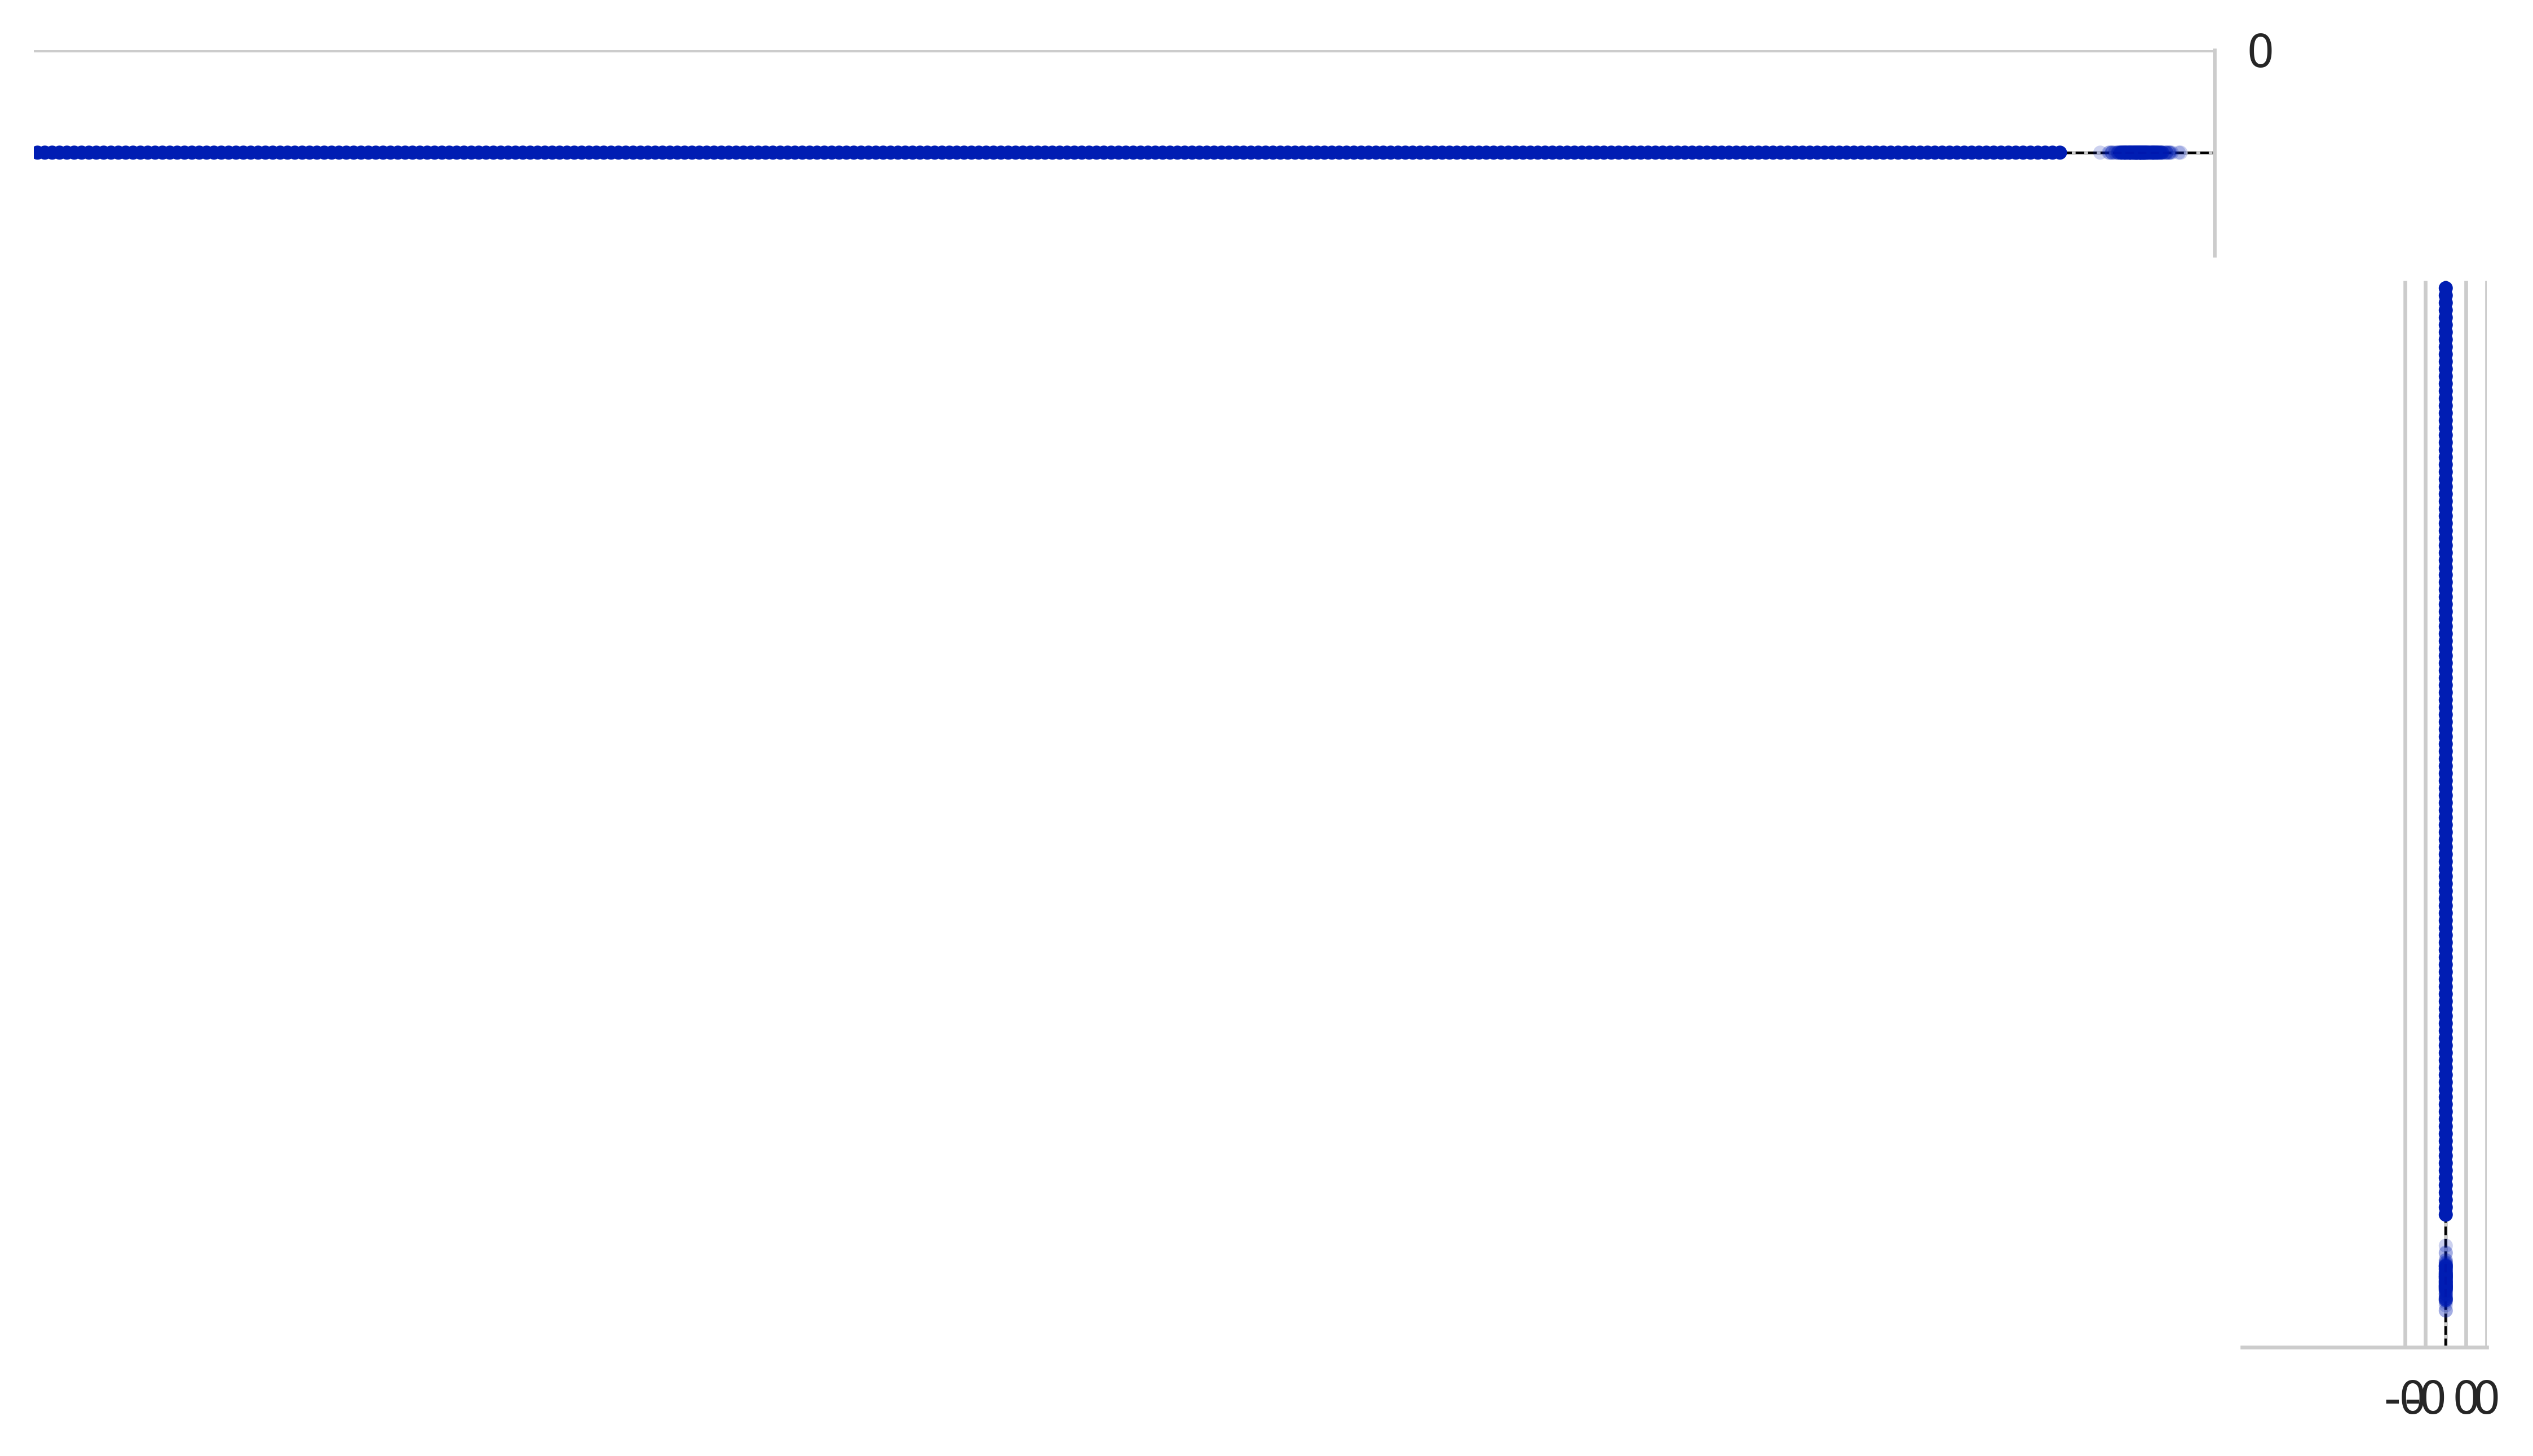

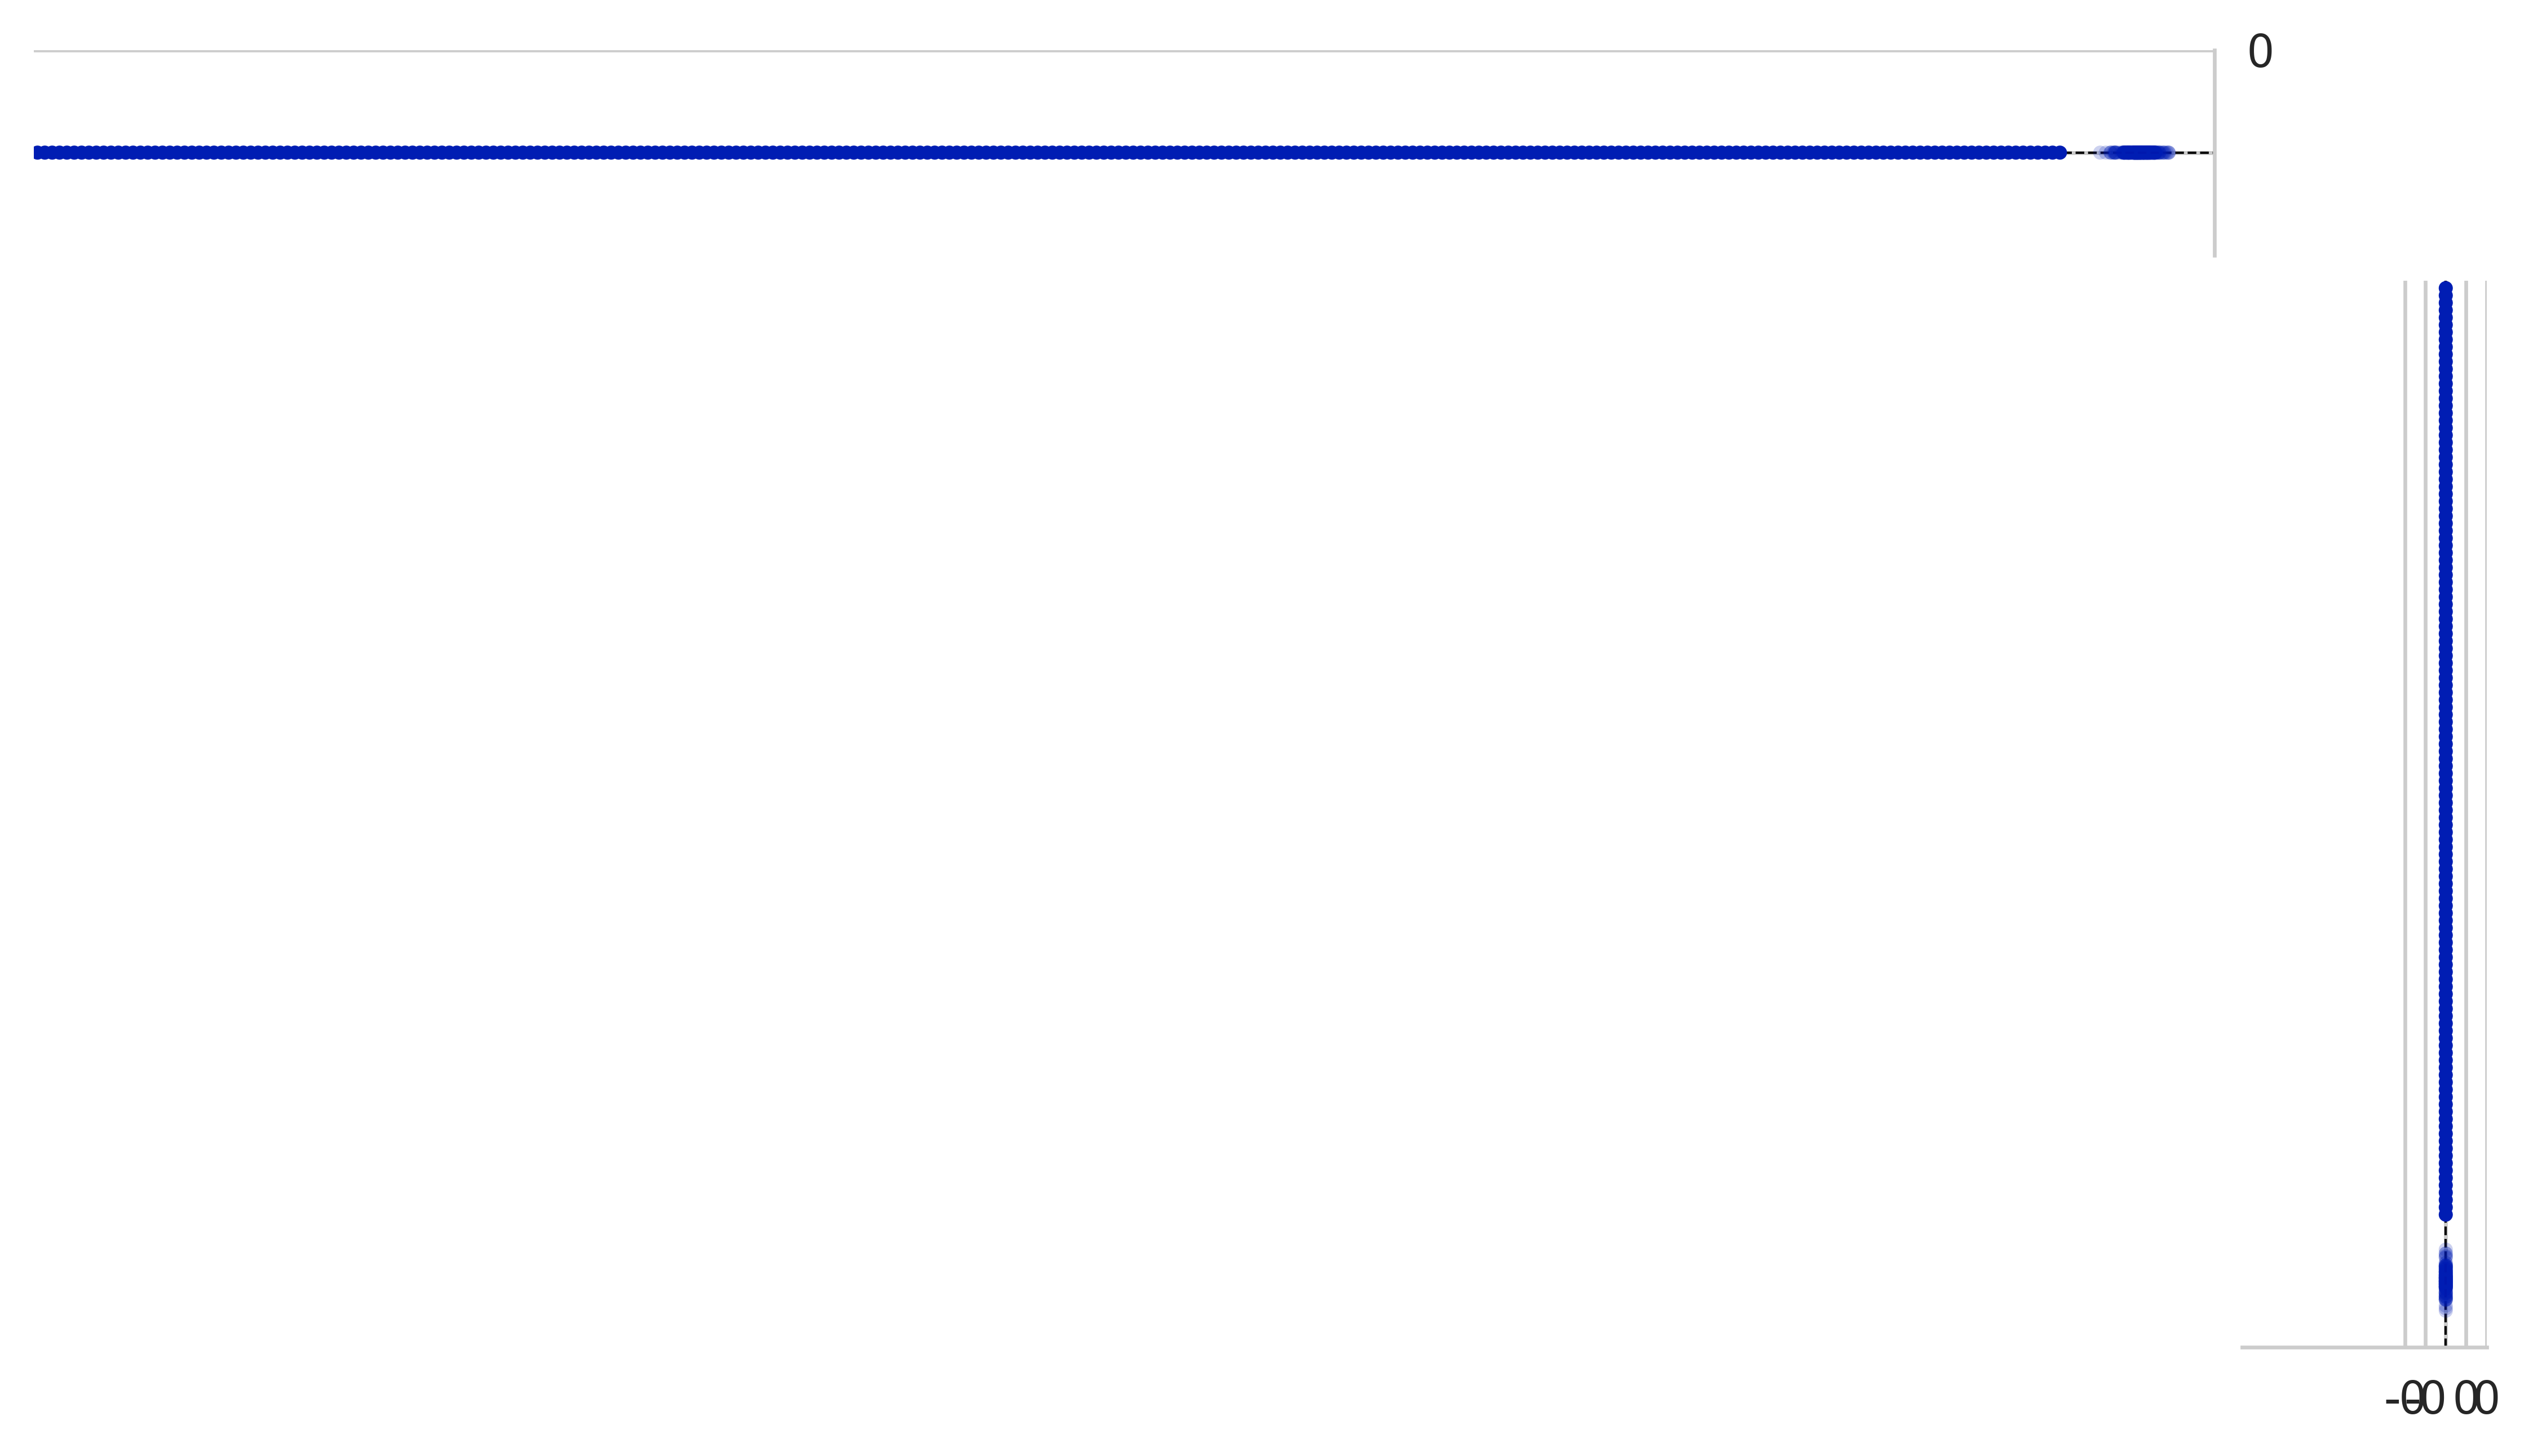

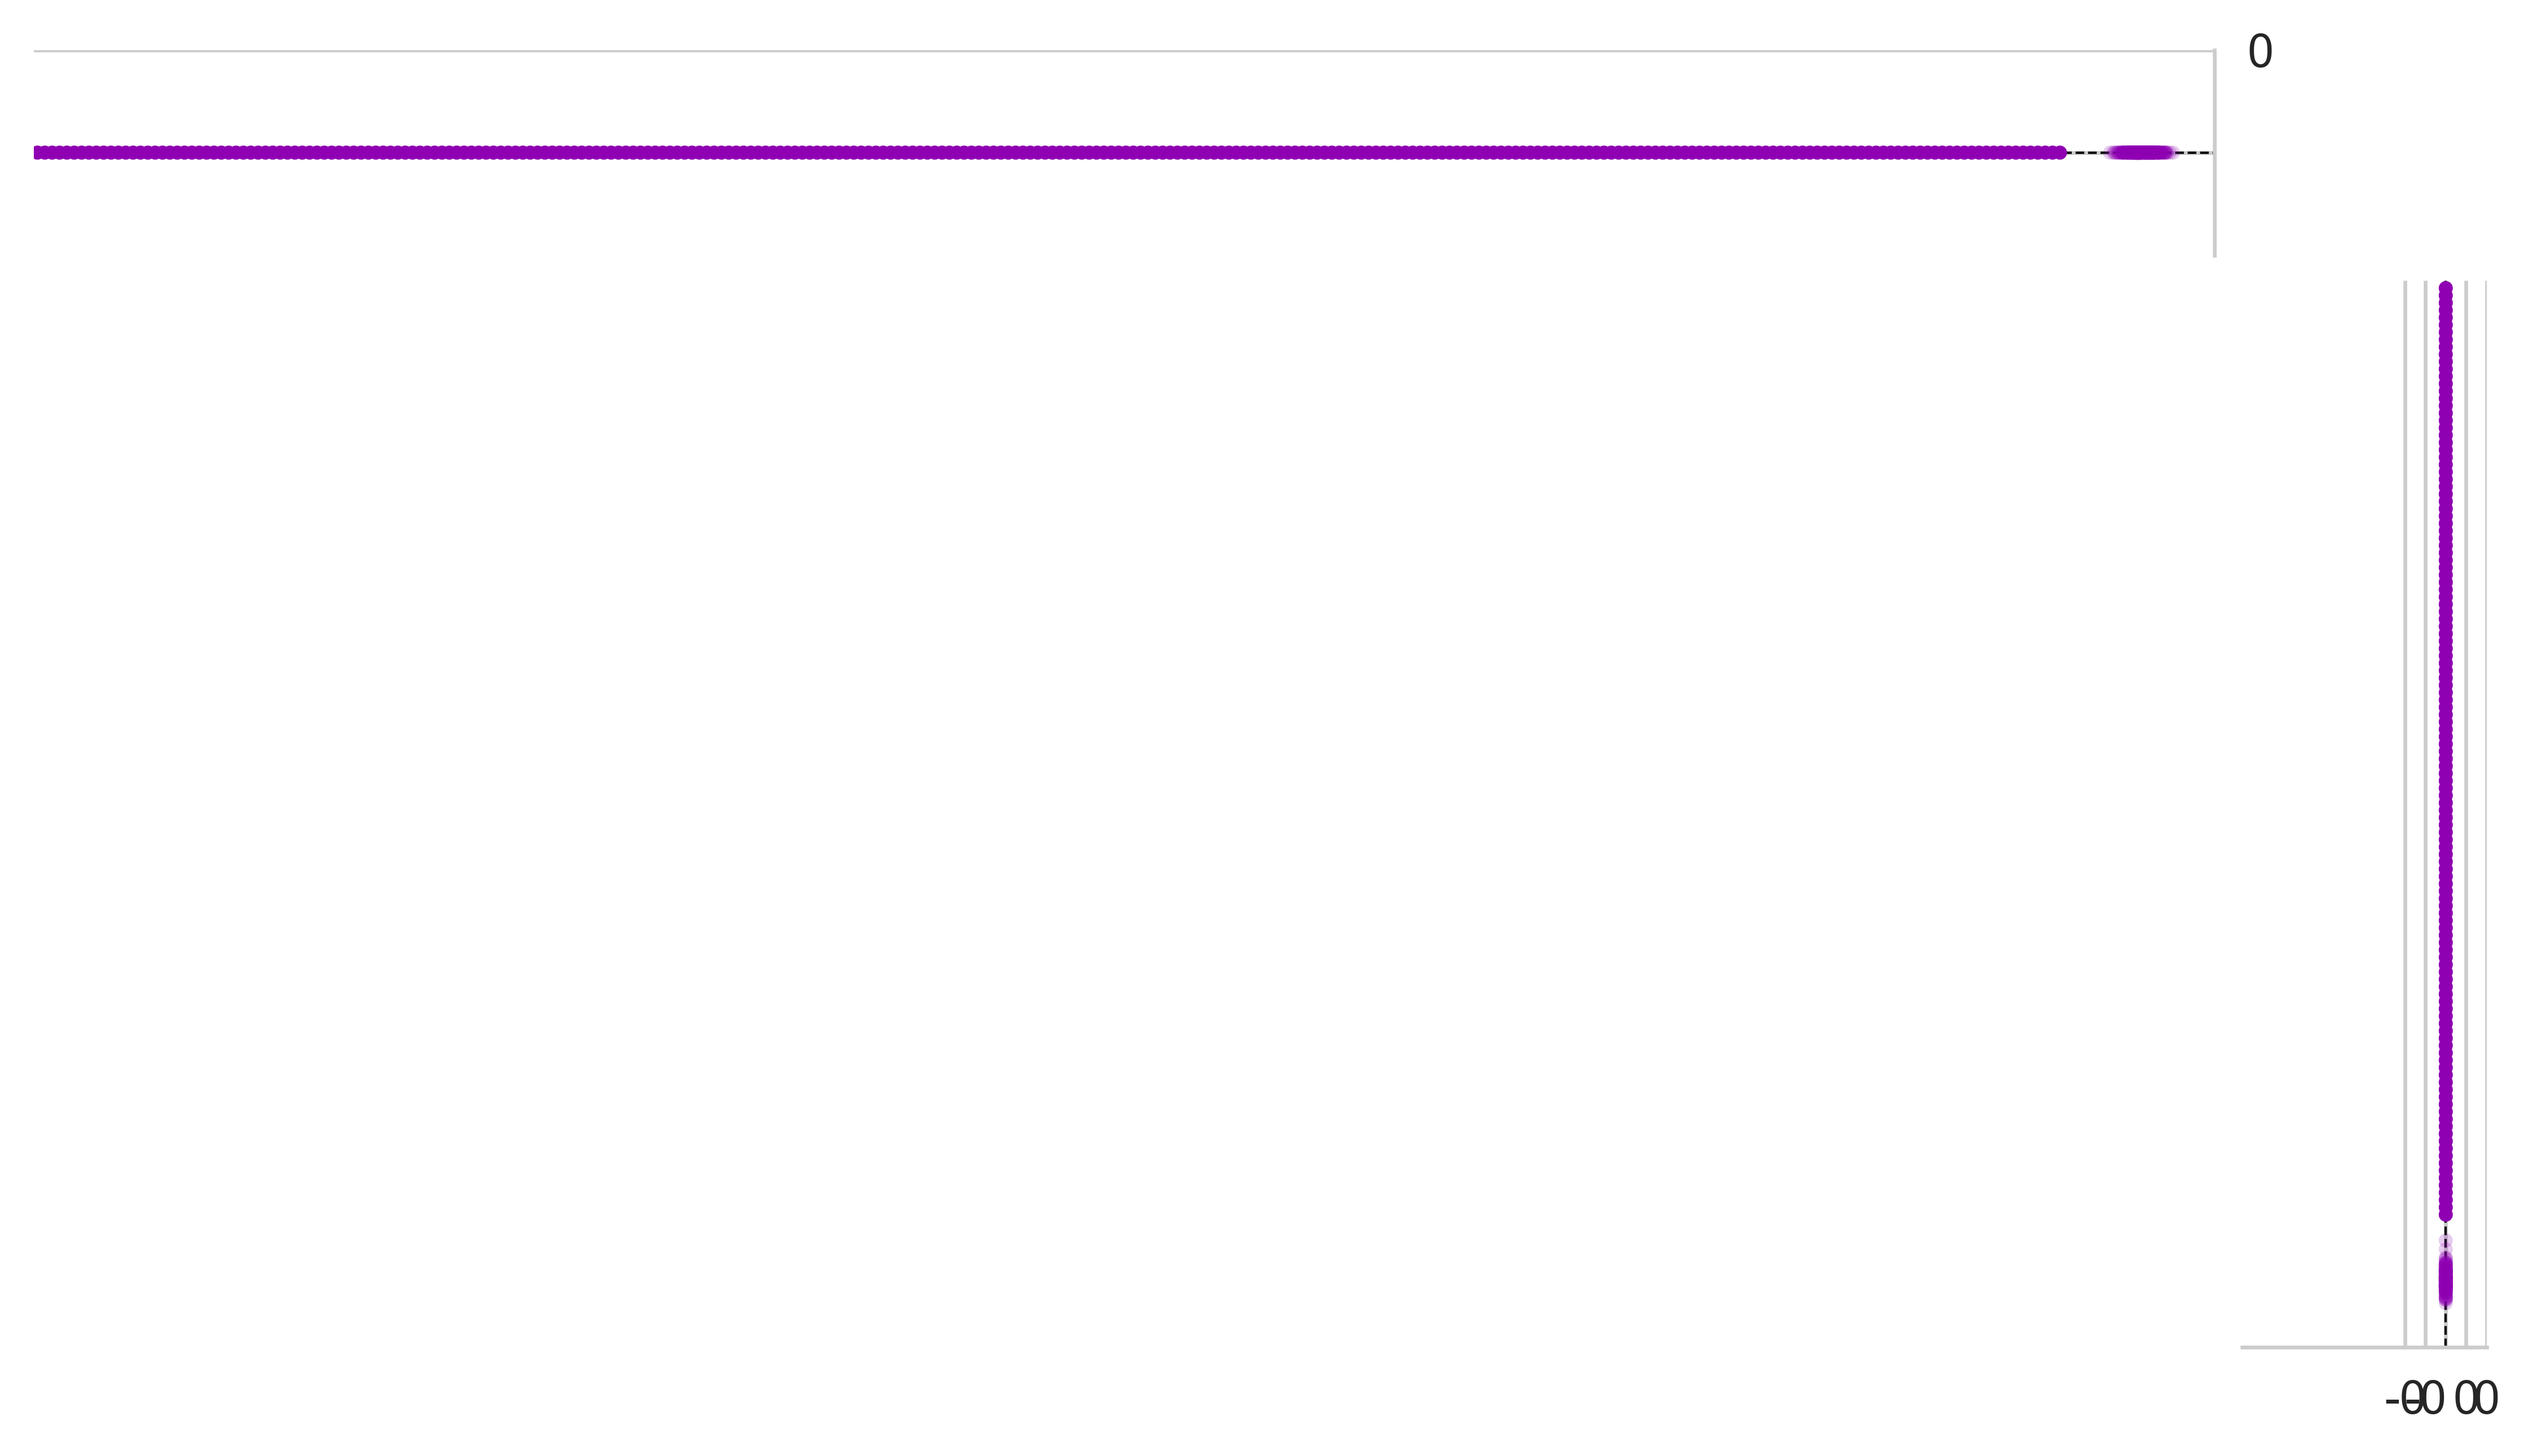

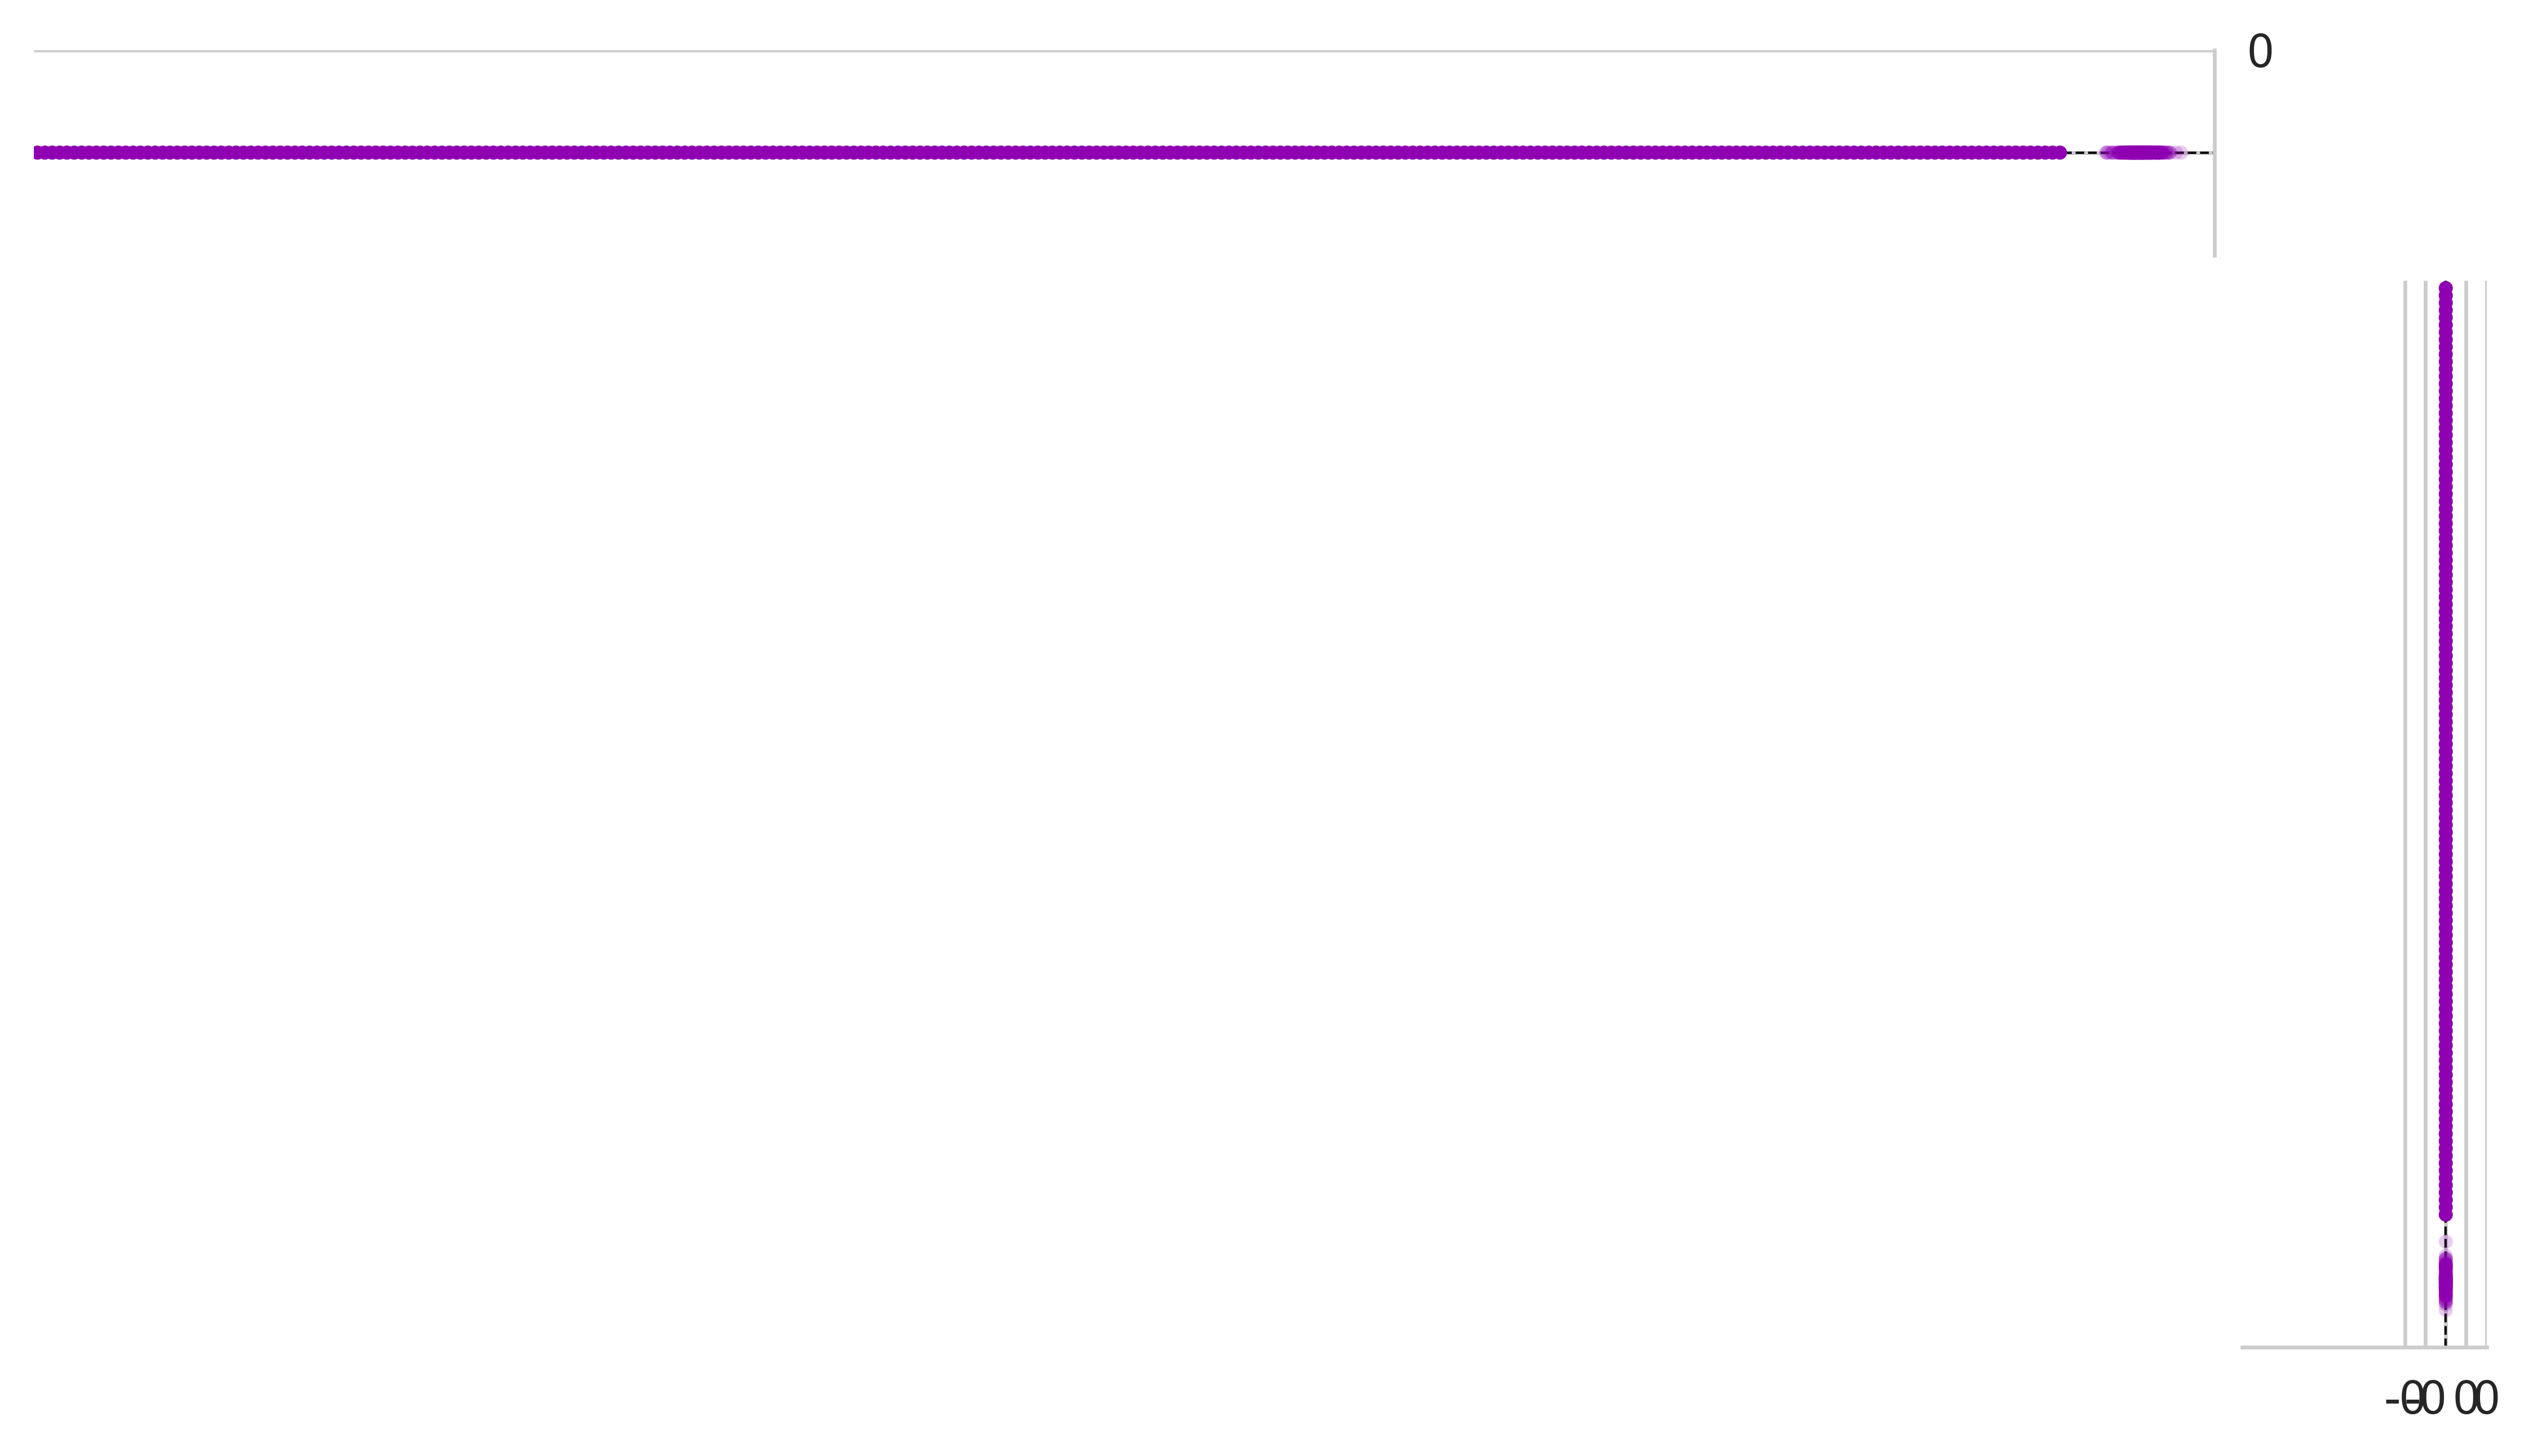

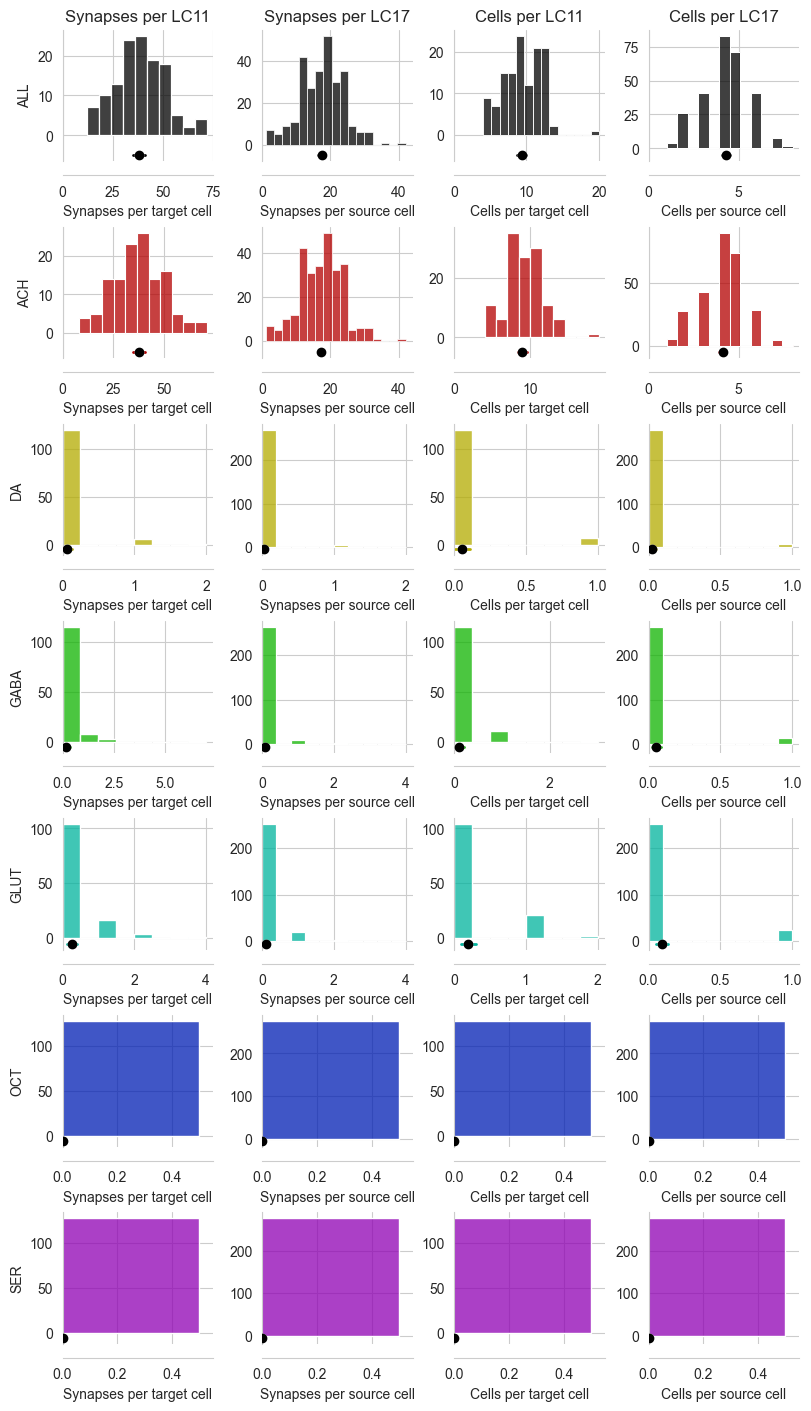

In [5]:
# connectivity_panel
groups = [cell_a, cell_b]
data_dir = 'demo'
panel_data = database.connectivity_panel(['LC11'], ['LC11', 'LC17'], data_dir=data_dir, transmitters=True)

In [ ]:
# get_downstream_convergence
downstream = database.get_downstream_convergence(cell_a, cell_b, True, max_hops=3)

Found 127 neurons matching the given criteria.
Using materialization version 783.
Found 276 neurons matching the given criteria.
Using materialization version 783.
Completed 1 hops involving 7662 cells and 107522 edges.
Completed 2 hops involving 79627 cells and 3103422 edges.
Completed 3 hops involving 45928 cells and 3559264 edges.
Using materialization version 783.
Found 133344 nodes and 2213178 edges for LC11.
Completed 1 hops involving 3404 cells and 124067 edges.
Completed 2 hops involving 73351 cells and 2279429 edges.
Completed 3 hops involving 53896 cells and 4152644 edges.
Using materialization version 783.
Found 130927 nodes and 2116113 edges for LC17.
Using materialization version 783.
